# Objective: To carry out linear regression (including multiple regression) and build a regression model using Python Platform

Case studies to consider:

1. Predict a car's fuel economy from its physical parameters such as weight and engine size and power

Outcomes:

1. To learn how to define, fit, and use a model in Python

2. To interpret the results

Part-A: Simple linear regression and Multiclass linear regression with data preprocessing (Handling NA values)

In [73]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [102]:
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, mean_squared_error, roc_curve, roc_auc_score, auc, r2_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RepeatedStratifiedKFold
from itertools import cycle

import warnings
warnings.filterwarnings('ignore')

## 1. Load the dataset (Use pandas )



 

 


In [103]:
auto_data = pd.read_csv("DSc-1b-dataset.csv")

In [104]:
auto_data

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
395,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
396,28.0,4,120.0,79,2625,18.6,82,1,ford ranger


In [105]:
auto_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [106]:
auto_data.describe() #information about stats

,mpg,cylinders,displacement,weight,acceleration,model year,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


## 2. Data Preprocessing (Handling NA values)

Number of Instances: 398

Number of Attributes: 9 including the class attribute

Attribute Information:

1. mpg: continuous

2. cylinders: multi-valued discrete

3. displacement: continuous

4. horsepower: continuous

5. weight: continuous

6. acceleration: continuous

7. model year: multi-valued discrete

8. origin: multi-valued discrete

9. car name: string (unique for each instance)

Missing Attribute Values: horsepower has 6 missing values

### Divide into categorical and numerical columns

In [107]:
auto_data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [108]:
numerics = ['int8', 'int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numeric_columns = []
categorical_columns = []
features = auto_data.columns.values.tolist()

In [109]:
for col in features:
    if auto_data[col].dtype in numerics:
        numeric_columns.append(col)
    else:
        categorical_columns.append(col)

In [110]:
len(auto_data.horsepower.unique())

94

In [111]:
print("Numeric Columns:", numeric_columns)

Numeric Columns: ['mpg', 'cylinders', 'displacement', 'weight', 'acceleration', 'model year', 'origin']


In [112]:
print("Categorical Columns:", categorical_columns)

Categorical Columns: ['horsepower', 'car name']


Specify '?' as null in horsepower and find missing values

In [113]:
auto_data.loc[auto_data['horsepower']=='?']

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
32,25.0,4,98.0,?,2046,19.0,71,1,ford pinto
126,21.0,6,200.0,?,2875,17.0,74,1,ford maverick
330,40.9,4,85.0,?,1835,17.3,80,2,renault lecar deluxe
336,23.6,4,140.0,?,2905,14.3,80,1,ford mustang cobra
354,34.5,4,100.0,?,2320,15.8,81,2,renault 18i
374,23.0,4,151.0,?,3035,20.5,82,1,amc concord dl


In [114]:
auto_data = pd.read_csv("DSc-1b-dataset.csv", na_values=['?'])

In [115]:
auto_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(4), int64(4), object(1)
memory usage: 28.1+ KB


In [116]:
print(auto_data.isnull().sum())

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64


6 null values in horsepower column. 

Convert into Numeric

In [117]:
auto_data['horsepower'] = auto_data['horsepower'].astype(str).astype(float)

In [118]:
auto_data.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


Replace with mean

In [119]:
auto_data.median()

mpg               23.0
cylinders          4.0
displacement     148.5
horsepower        93.5
weight          2803.5
acceleration      15.5
model year        76.0
origin             1.0
dtype: float64

In [120]:
auto_data['horsepower']=auto_data['horsepower'].fillna(auto_data['horsepower'].median())

In [121]:
print(auto_data.isnull().sum())

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64


Dataset is free from null values

Drop car name column

In [122]:
auto_data = auto_data.drop('car name', axis=1)

In [123]:
auto_data

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,18.0,8,307.0,130.0,3504,12.0,70,1
1,15.0,8,350.0,165.0,3693,11.5,70,1
2,18.0,8,318.0,150.0,3436,11.0,70,1
3,16.0,8,304.0,150.0,3433,12.0,70,1
4,17.0,8,302.0,140.0,3449,10.5,70,1
...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,1
394,44.0,4,97.0,52.0,2130,24.6,82,2
395,32.0,4,135.0,84.0,2295,11.6,82,1
396,28.0,4,120.0,79.0,2625,18.6,82,1


## 3. Exploratory Data Analysis (understanding the relationships between the variables with help of plot, scatter-plot, enery-plot etc) Use matplotlib 

### Outlier Detection

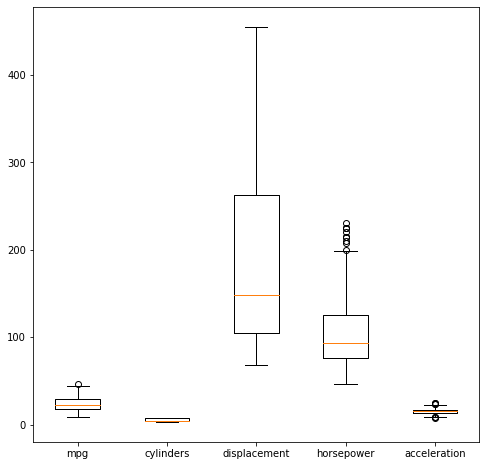

In [129]:
data_columns = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration']
plt.figure(figsize=(8,8))
plt.boxplot([vals.dropna() for col, vals in auto_data[['mpg', 'cylinders', 'displacement', 'horsepower', 'acceleration']].iteritems()])
plt.xticks([1,2,3,4,5], ['mpg', 'cylinders', 'displacement', 'horsepower', 'acceleration'])
plt.show()

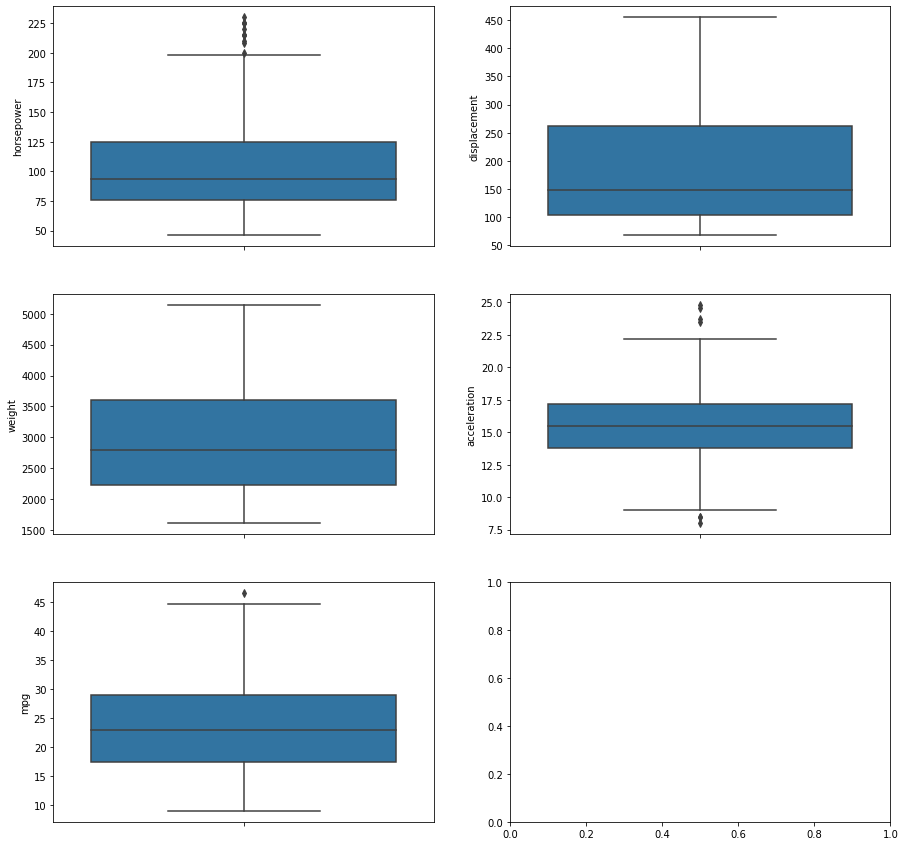

In [130]:
f, axes = plt.subplots(3, 2, figsize=(15,15))
bp = sns.boxplot(data=auto_data, y='horsepower', ax=axes[0,0])
bp = sns.boxplot(data=auto_data, y='displacement', ax=axes[0,1])
bp = sns.boxplot(data=auto_data, y='weight', ax=axes[1,0])
bp = sns.boxplot(data=auto_data, y='acceleration', ax=axes[1,1])
bp = sns.boxplot(data=auto_data, y='mpg', ax=axes[2,0])

MPG, Horsepower and acceleration have outliers

Handle Outliers with upper and lower limits

In [131]:
data_columns = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration']
def treat_outliers():
    for col in data_columns:
        Q1 = auto_data[col].quantile(0.25)
        Q3 = auto_data[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_limit = Q1 - 1.5*IQR
        upper_limit = Q3 +1.5*IQR
        auto_data.loc[(auto_data[col] > upper_limit), col] = upper_limit
        auto_data.loc[(auto_data[col] < lower_limit), col] = lower_limit

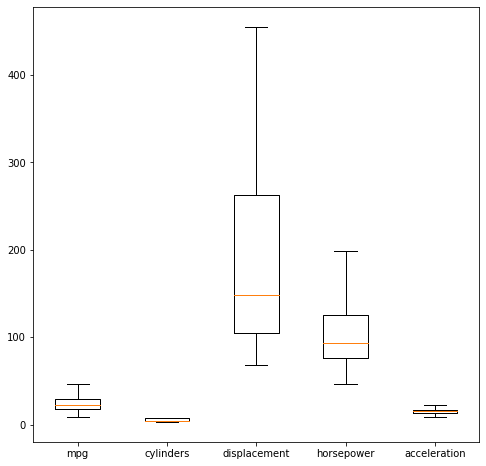

In [133]:
treat_outliers()
plt.figure(figsize=(8,8))
plt.boxplot([vals.dropna() for col, vals in auto_data[['mpg', 'cylinders', 'displacement', 'horsepower', 'acceleration']].iteritems()])
plt.xticks([1,2,3,4,5], ['mpg', 'cylinders', 'displacement', 'horsepower', 'acceleration'])
plt.show()

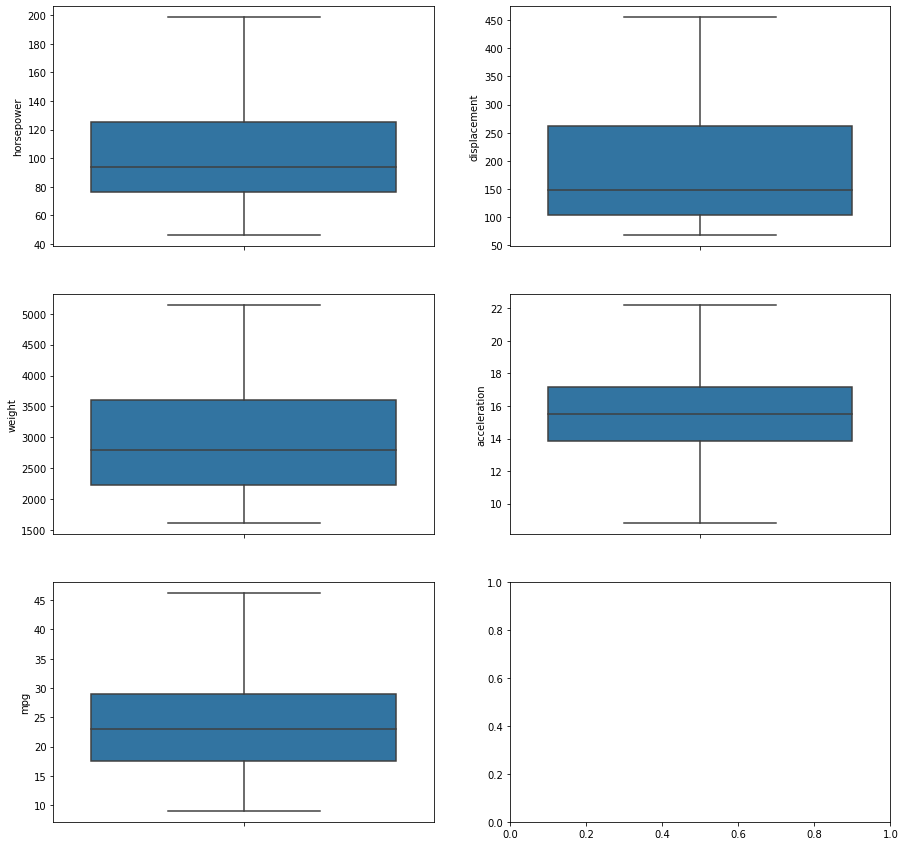

In [134]:
f, axes = plt.subplots(3, 2, figsize=(15,15))
bp = sns.boxplot(data=auto_data, y='horsepower', ax=axes[0,0])
bp = sns.boxplot(data=auto_data, y='displacement', ax=axes[0,1])
bp = sns.boxplot(data=auto_data, y='weight', ax=axes[1,0])
bp = sns.boxplot(data=auto_data, y='acceleration', ax=axes[1,1])
bp = sns.boxplot(data=auto_data, y='mpg', ax=axes[2,0])

### Correlation Matrix 

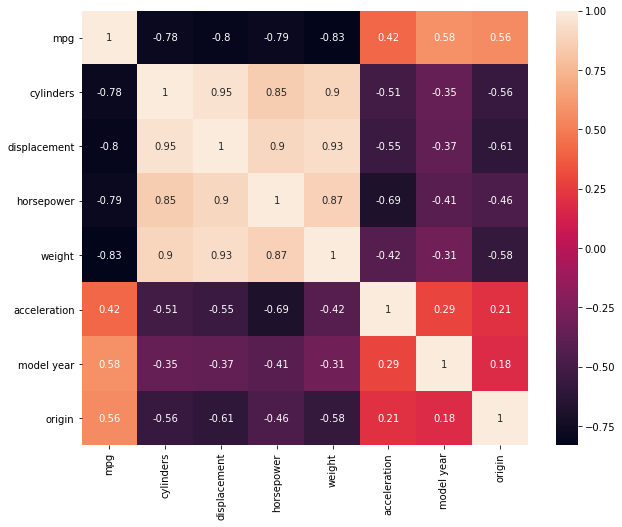

In [135]:
correlation_data = auto_data.corr()
plt.subplots(figsize=(10,8))
sns.heatmap(correlation_data, annot=True)
plt.show()

In [139]:
correlation_values = correlation_data['mpg'].sort_values(ascending=False)
correlation_values = abs(correlation_values).sort_values(ascending=False)
print("Correlation wrt MPG")
print(abs(correlation_values).sort_values(ascending=False))

Correlation wrt MPG
mpg             1.000000
weight          0.831901
displacement    0.804353
horsepower      0.785846
cylinders       0.775556
model year      0.579337
origin          0.563436
acceleration    0.418333
Name: mpg, dtype: float64


## 4. Data Partition (80% for training and 20% for testing) (Use scikit-learn)


In [140]:
X = auto_data.drop(columns='mpg')# Independent attribute
Y = auto_data[['mpg']]# Dependent attributes
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=27)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test= scaler.transform(X_test)

## 5. Build the model (use scikit learn)

In [141]:
linear_regression_model = LinearRegression()
linear_regression_model.fit(X_train, y_train)

LinearRegression()

## 6. Summarize the model.

In [142]:
linear_regression_model.get_params()

{'copy_X': True,
 'fit_intercept': True,
 'n_jobs': None,
 'normalize': False,
 'positive': False}

## 7. Evaluate the model

In [150]:
linear_regression_score = linear_regression_model.score(X_test, y_test)
print("Test Score: ", round(linear_regression_score, 4))

Test Score:  0.8826


In [152]:
print("Mean squared error(MSE): ", round(mean_squared_error(y_test, y_pred), 4))

Mean squared error(MSE):  8.3969


Conclusion:
1. In Auto MPG dataset, replace with median imputation technique was used. 
2. High correlation with MPG was obtained for weight. 
3. The Linear Regression score obtained was 0.8826.

# Part-B: Logistic Regression 

2)	Estimating horse fatalities from colic- use logistic regression to try to predict if a horse with colic will live or die

## 1. Load the dataset (Use pandas )

In [252]:
horse_data = pd.read_csv("horse.csv")

In [253]:
horse_data

,surgery,age,hospital_number,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,...,packed_cell_volume,total_protein,abdomo_appearance,abdomo_protein,outcome,surgical_lesion,lesion_1,lesion_2,lesion_3,cp_data
0,no,adult,530101,38.5,66.0,28.0,cool,reduced,NaN,more_3_sec,...,45.0,8.4,NaN,NaN,died,no,11300,0,0,no
1,yes,adult,534817,39.2,88.0,20.0,NaN,NaN,pale_cyanotic,less_3_sec,...,50.0,85.0,cloudy,2.0,euthanized,no,2208,0,0,no
2,no,adult,530334,38.3,40.0,24.0,normal,normal,pale_pink,less_3_sec,...,33.0,6.7,NaN,NaN,lived,no,0,0,0,yes
3,yes,young,5290409,39.1,164.0,84.0,cold,normal,dark_cyanotic,more_3_sec,...,48.0,7.2,serosanguious,5.3,died,yes,2208,0,0,yes
4,no,adult,530255,37.3,104.0,35.0,NaN,NaN,dark_cyanotic,more_3_sec,...,74.0,7.4,NaN,NaN,died,no,4300,0,0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,yes,adult,533886,NaN,120.0,70.0,cold,NaN,pale_cyanotic,more_3_sec,...,55.0,65.0,NaN,NaN,euthanized,no,3205,0,0,no
295,no,adult,527702,37.2,72.0,24.0,cool,increased,pale_cyanotic,more_3_sec,...,44.0,NaN,serosanguious,3.3,euthanized,yes,2208,0,0,yes
296,yes,adult,529386,37.5,72.0,30.0,cold,reduced,pale_cyanotic,less_3_sec,...,60.0,6.8,NaN,NaN,died,yes,3205,0,0,no
297,yes,adult,530612,36.5,100.0,24.0,cool,reduced,pale_pink,less_3_sec,...,50.0,6.0,serosanguious,3.4,lived,yes,2208,0,0,yes


In [254]:
horse_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 28 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   surgery                299 non-null    object 
 1   age                    299 non-null    object 
 2   hospital_number        299 non-null    int64  
 3   rectal_temp            239 non-null    float64
 4   pulse                  275 non-null    float64
 5   respiratory_rate       241 non-null    float64
 6   temp_of_extremities    243 non-null    object 
 7   peripheral_pulse       230 non-null    object 
 8   mucous_membrane        252 non-null    object 
 9   capillary_refill_time  267 non-null    object 
 10  pain                   244 non-null    object 
 11  peristalsis            255 non-null    object 
 12  abdominal_distention   243 non-null    object 
 13  nasogastric_tube       195 non-null    object 
 14  nasogastric_reflux     193 non-null    object 
 15  nasoga

In [255]:
horse_data.describe()

,hospital_number,rectal_temp,pulse,respiratory_rate,nasogastric_reflux_ph,packed_cell_volume,total_protein,abdomo_protein,lesion_1,lesion_2,lesion_3
count,2.990000e+02,239.000000,275.000000,241.000000,53.000000,270.000000,266.000000,101.000000,299.000000,299.000000,299.000000
mean,1.087733e+06,38.168619,72.000000,30.460581,4.707547,46.307407,24.274436,3.039604,3659.709030,90.528428,7.387960
std,1.532032e+06,0.733744,28.646219,17.666102,1.982311,10.436743,27.364194,1.967947,5408.472421,650.637139,127.749768
min,5.184760e+05,35.400000,30.000000,8.000000,1.000000,23.000000,3.300000,0.100000,0.000000,0.000000,0.000000
25%,5.289040e+05,37.800000,48.000000,18.000000,3.000000,38.000000,6.500000,2.000000,2111.500000,0.000000,0.000000
50%,5.303010e+05,38.200000,64.000000,25.000000,5.000000,45.000000,7.500000,2.300000,2322.000000,0.000000,0.000000
75%,5.347360e+05,38.500000,88.000000,36.000000,6.500000,52.000000,56.750000,3.900000,3209.000000,0.000000,0.000000
max,5.305629e+06,40.800000,184.000000,96.000000,7.500000,75.000000,89.000000,10.100000,41110.000000,7111.000000,2209.000000


## 2. Data Preprocessing (Handling NA values)

Attribute Information:

1: surgery? 
1 = Yes, it had surgery 
2 = It was treated without surgery 

2: Age 
1 = Adult horse 
2 = Young (< 6 months) 

3: Hospital Number 
- numeric id 
- the case number assigned to the horse (may not be unique if the horse is treated > 1 time) 

4: rectal temperature 
- linear 
- in degrees celsius. 
- An elevated temp may occur due to infection. 
- temperature may be reduced when the animal is in late shock 
- normal temp is 37.8 
- this parameter will usually change as the problem progresses, eg. may start out normal, then become elevated because of the lesion, passing back through the normal range as the horse goes into shock 
5: pulse 
- linear 
- the heart rate in beats per minute 
- is a reflection of the heart condition: 30 -40 is normal for adults 
- rare to have a lower than normal rate although athletic horses may have a rate of 20-25 
- animals with painful lesions or suffering from circulatory shock may have an elevated heart rate 

6: respiratory rate 
- linear 
- normal rate is 8 to 10 
- usefulness is doubtful due to the great fluctuations 

7: temperature of extremities 
- a subjective indication of peripheral circulation 
- possible values: 
1 = Normal 
2 = Warm 
3 = Cool 
4 = Cold 
- cool to cold extremities indicate possible shock 
- hot extremities should correlate with an elevated rectal temp. 

8: peripheral pulse 
- subjective 
- possible values are: 
1 = normal 
2 = increased 
3 = reduced 
4 = absent 
- normal or increased p.p. are indicative of adequate circulation while reduced or absent indicate poor perfusion 

9: mucous membranes 
- a subjective measurement of colour 
- possible values are: 
1 = normal pink 
2 = bright pink 
3 = pale pink 
4 = pale cyanotic 
5 = bright red / injected 
6 = dark cyanotic 
- 1 and 2 probably indicate a normal or slightly increased circulation 
- 3 may occur in early shock 
- 4 and 6 are indicative of serious circulatory compromise 
- 5 is more indicative of a septicemia 

10: capillary refill time 
- a clinical judgement. The longer the refill, the poorer the circulation 
- possible values 
1 = < 3 seconds 
2 = >= 3 seconds 

11: pain - a subjective judgement of the horse's pain level 
- possible values: 
1 = alert, no pain 
2 = depressed 
3 = intermittent mild pain 
4 = intermittent severe pain 
5 = continuous severe pain 
- should NOT be treated as a ordered or discrete variable! 
- In general, the more painful, the more likely it is to require surgery 
- prior treatment of pain may mask the pain level to some extent 

12: peristalsis 
- an indication of the activity in the horse's gut. As the gut becomes more distended or the horse becomes more toxic, the activity decreases 
- possible values: 
1 = hypermotile 
2 = normal 
3 = hypomotile 
4 = absent 

13: abdominal distension 
- An IMPORTANT parameter. 
- possible values 
1 = none 
2 = slight 
3 = moderate 
4 = severe 
- an animal with abdominal distension is likely to be painful and have reduced gut motility. 
- a horse with severe abdominal distension is likely to require surgery just tio relieve the pressure 

14: nasogastric tube 
- this refers to any gas coming out of the tube 
- possible values: 
1 = none 
2 = slight 
3 = significant 
- a large gas cap in the stomach is likely to give the horse discomfort 

15: nasogastric reflux 
- possible values 
1 = none 
2 = > 1 liter 
3 = < 1 liter 
- the greater amount of reflux, the more likelihood that there is some serious obstruction to the fluid passage from the rest of the intestine 

16: nasogastric reflux PH 
- linear 
- scale is from 0 to 14 with 7 being neutral 
- normal values are in the 3 to 4 range 

17: rectal examination - feces 
- possible values 
1 = normal 
2 = increased 
3 = decreased 
4 = absent 
- absent feces probably indicates an obstruction 

18: abdomen 
- possible values 
1 = normal 
2 = other 
3 = firm feces in the large intestine 
4 = distended small intestine 
5 = distended large intestine 
- 3 is probably an obstruction caused by a mechanical impaction and is normally treated medically 
- 4 and 5 indicate a surgical lesion 

19: packed cell volume 
- linear 
- the # of red cells by volume in the blood 
- normal range is 30 to 50. The level rises as the circulation becomes compromised or as the animal becomes dehydrated. 

20: total protein 
- linear 
- normal values lie in the 6-7.5 (gms/dL) range 
- the higher the value the greater the dehydration 

21: abdominocentesis appearance 
- a needle is put in the horse's abdomen and fluid is obtained from 
the abdominal cavity 
- possible values: 
1 = clear 
2 = cloudy 
3 = serosanguinous 
- normal fluid is clear while cloudy or serosanguinous indicates a compromised gut 

22: abdomcentesis total protein 
- linear 
- the higher the level of protein the more likely it is to have a compromised gut. Values are in gms/dL 

23: outcome 
- what eventually happened to the horse? 
- possible values: 
1 = lived 
2 = died 
3 = was euthanized 

24: surgical lesion? 
- retrospectively, was the problem (lesion) surgical? 
- all cases are either operated upon or autopsied so that this value and the lesion type are always known 
- possible values: 
1 = Yes 
2 = No 

25, 26, 27: type of lesion 
- first number is site of lesion 
1 = gastric 
2 = sm intestine 
3 = lg colon 
4 = lg colon and cecum 
5 = cecum 
6 = transverse colon 
7 = retum/descending colon 
8 = uterus 
9 = bladder 
11 = all intestinal sites 
00 = none 
- second number is type 
1 = simple 
2 = strangulation 
3 = inflammation 
4 = other 
- third number is subtype 
1 = mechanical 
2 = paralytic 
0 = n/a 
- fourth number is specific code 
1 = obturation 
2 = intrinsic 
3 = extrinsic 
4 = adynamic 
5 = volvulus/torsion 
6 = intussuption 
7 = thromboembolic 
8 = hernia 
9 = lipoma/slenic incarceration 
10 = displacement 
0 = n/a 
28: cp_data 
- is pathology data present for this case? 
1 = Yes 
2 = No 
- this variable is of no significance since pathology data is not included or collected for these cases

In [256]:
print(horse_data.isnull().sum())

surgery                    0
age                        0
hospital_number            0
rectal_temp               60
pulse                     24
respiratory_rate          58
temp_of_extremities       56
peripheral_pulse          69
mucous_membrane           47
capillary_refill_time     32
pain                      55
peristalsis               44
abdominal_distention      56
nasogastric_tube         104
nasogastric_reflux       106
nasogastric_reflux_ph    246
rectal_exam_feces        102
abdomen                  118
packed_cell_volume        29
total_protein             33
abdomo_appearance        165
abdomo_protein           198
outcome                    0
surgical_lesion            0
lesion_1                   0
lesion_2                   0
lesion_3                   0
cp_data                    0
dtype: int64


Removing columns with more than 30% of null values

In [257]:
# Finding columns having null values more than 30%
null_columns = horse_data.columns[horse_data.isna().mean() > 0.30]
null_columns

Index(['nasogastric_tube', 'nasogastric_reflux', 'nasogastric_reflux_ph',
       'rectal_exam_feces', 'abdomen', 'abdomo_appearance', 'abdomo_protein'],
      dtype='object')

In [258]:
horse_data = horse_data.drop(columns = null_columns)
horse_data

,surgery,age,hospital_number,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,...,peristalsis,abdominal_distention,packed_cell_volume,total_protein,outcome,surgical_lesion,lesion_1,lesion_2,lesion_3,cp_data
0,no,adult,530101,38.5,66.0,28.0,cool,reduced,NaN,more_3_sec,...,absent,severe,45.0,8.4,died,no,11300,0,0,no
1,yes,adult,534817,39.2,88.0,20.0,NaN,NaN,pale_cyanotic,less_3_sec,...,absent,slight,50.0,85.0,euthanized,no,2208,0,0,no
2,no,adult,530334,38.3,40.0,24.0,normal,normal,pale_pink,less_3_sec,...,hypomotile,none,33.0,6.7,lived,no,0,0,0,yes
3,yes,young,5290409,39.1,164.0,84.0,cold,normal,dark_cyanotic,more_3_sec,...,absent,severe,48.0,7.2,died,yes,2208,0,0,yes
4,no,adult,530255,37.3,104.0,35.0,NaN,NaN,dark_cyanotic,more_3_sec,...,NaN,NaN,74.0,7.4,died,no,4300,0,0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,yes,adult,533886,NaN,120.0,70.0,cold,NaN,pale_cyanotic,more_3_sec,...,absent,NaN,55.0,65.0,euthanized,no,3205,0,0,no
295,no,adult,527702,37.2,72.0,24.0,cool,increased,pale_cyanotic,more_3_sec,...,hypomotile,moderate,44.0,NaN,euthanized,yes,2208,0,0,yes
296,yes,adult,529386,37.5,72.0,30.0,cold,reduced,pale_cyanotic,less_3_sec,...,absent,moderate,60.0,6.8,died,yes,3205,0,0,no
297,yes,adult,530612,36.5,100.0,24.0,cool,reduced,pale_pink,less_3_sec,...,hypomotile,moderate,50.0,6.0,lived,yes,2208,0,0,yes


### Dividing into categorical and numerical columns

In [259]:
numerics = ['int8', 'int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numerical_columns = []
categorical_columns = []
features = horse_data.columns.values.tolist()
for col in features:
    if horse_data[col].dtype in numerics:
        numerical_columns.append(col)
    else:
        categorical_columns.append(col)
print("Numerical Columns: ", numerical_columns)

print("\nCategorical Columns: ", categorical_columns)

Numerical Columns:  ['hospital_number', 'rectal_temp', 'pulse', 'respiratory_rate', 'packed_cell_volume', 'total_protein', 'lesion_1', 'lesion_2', 'lesion_3']

Categorical Columns:  ['surgery', 'age', 'temp_of_extremities', 'peripheral_pulse', 'mucous_membrane', 'capillary_refill_time', 'pain', 'peristalsis', 'abdominal_distention', 'outcome', 'surgical_lesion', 'cp_data']


### Replacing NaN values with their median

In [260]:
for col in numerical_columns:
    horse_data.loc[(horse_data["outcome"] == 'died') & (horse_data[col].isnull()), col] = horse_data[horse_data["outcome"] == 'died'][col].median()
    horse_data.loc[(horse_data["outcome"] == 'euthanized') & (horse_data[col].isnull()), col] = horse_data[horse_data["outcome"] == 'euthanized'][col].median()
    horse_data.loc[(horse_data["outcome"] == 'lived') & (horse_data[col].isnull()), col] = horse_data[horse_data["outcome"] == 'lived'][col].median()

In [261]:
for col in categorical_columns:
    horse_data.loc[(horse_data["outcome"] == 'died') & (horse_data[col].isnull()), col] = horse_data[horse_data["outcome"] == 'died'][col].mode()[0]
    horse_data.loc[(horse_data["outcome"] == 'euthanized') & (horse_data[col].isnull()), col] = horse_data[horse_data["outcome"] == 'euthanized'][col].mode()[0]
    horse_data.loc[(horse_data["outcome"] == 'lived') & (horse_data[col].isnull()), col] = horse_data[horse_data["outcome"] == 'lived'][col].mode()[0]

### Converting to Numeric

In [262]:
for col in categorical_columns:
    cat_data = horse_data[col].astype('category')
    mapping = dict(enumerate(cat_data.cat.categories))
    print(col," : ",mapping,"\n")

surgery  :  {0: 'no', 1: 'yes'} 

age  :  {0: 'adult', 1: 'young'} 

temp_of_extremities  :  {0: 'cold', 1: 'cool', 2: 'normal', 3: 'warm'} 

peripheral_pulse  :  {0: 'absent', 1: 'increased', 2: 'normal', 3: 'reduced'} 

mucous_membrane  :  {0: 'bright_pink', 1: 'bright_red', 2: 'dark_cyanotic', 3: 'normal_pink', 4: 'pale_cyanotic', 5: 'pale_pink'} 

capillary_refill_time  :  {0: '3', 1: 'less_3_sec', 2: 'more_3_sec'} 

pain  :  {0: 'alert', 1: 'depressed', 2: 'extreme_pain', 3: 'mild_pain', 4: 'severe_pain'} 

peristalsis  :  {0: 'absent', 1: 'hypermotile', 2: 'hypomotile', 3: 'normal'} 

abdominal_distention  :  {0: 'moderate', 1: 'none', 2: 'severe', 3: 'slight'} 

outcome  :  {0: 'died', 1: 'euthanized', 2: 'lived'} 

surgical_lesion  :  {0: 'no', 1: 'yes'} 

cp_data  :  {0: 'no', 1: 'yes'} 



In [263]:
for col in categorical_columns:
    horse_data[col] = horse_data[col].astype('category').cat.codes

In [264]:
horse_data

,surgery,age,hospital_number,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,...,peristalsis,abdominal_distention,packed_cell_volume,total_protein,outcome,surgical_lesion,lesion_1,lesion_2,lesion_3,cp_data
0,0,0,530101.0,38.50,66.0,28.0,1,3,4,2,...,0,2,45.0,8.4,0,0,11300.0,0.0,0.0,0
1,1,0,534817.0,39.20,88.0,20.0,1,3,4,1,...,0,3,50.0,85.0,1,0,2208.0,0.0,0.0,0
2,0,0,530334.0,38.30,40.0,24.0,2,2,5,1,...,2,1,33.0,6.7,2,0,0.0,0.0,0.0,1
3,1,1,5290409.0,39.10,164.0,84.0,0,2,2,2,...,0,2,48.0,7.2,0,1,2208.0,0.0,0.0,1
4,0,0,530255.0,37.30,104.0,35.0,1,3,2,2,...,2,0,74.0,7.4,0,0,4300.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,1,0,533886.0,38.05,120.0,70.0,0,3,4,2,...,0,0,55.0,65.0,1,0,3205.0,0.0,0.0,0
295,0,0,527702.0,37.20,72.0,24.0,1,1,4,2,...,2,0,44.0,56.0,1,1,2208.0,0.0,0.0,1
296,1,0,529386.0,37.50,72.0,30.0,0,3,4,1,...,0,0,60.0,6.8,0,1,3205.0,0.0,0.0,0
297,1,0,530612.0,36.50,100.0,24.0,1,3,5,1,...,2,0,50.0,6.0,2,1,2208.0,0.0,0.0,1


In [265]:
horse_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   surgery                299 non-null    int8   
 1   age                    299 non-null    int8   
 2   hospital_number        299 non-null    float64
 3   rectal_temp            299 non-null    float64
 4   pulse                  299 non-null    float64
 5   respiratory_rate       299 non-null    float64
 6   temp_of_extremities    299 non-null    int8   
 7   peripheral_pulse       299 non-null    int8   
 8   mucous_membrane        299 non-null    int8   
 9   capillary_refill_time  299 non-null    int8   
 10  pain                   299 non-null    int8   
 11  peristalsis            299 non-null    int8   
 12  abdominal_distention   299 non-null    int8   
 13  packed_cell_volume     299 non-null    float64
 14  total_protein          299 non-null    float64
 15  outcom

## 3. Exploratory Data Analysis (understanding the relationships between the variables with help of plot, scatter-plot, energy-plot etc) Use matplotlib 

### Correlation Matrix

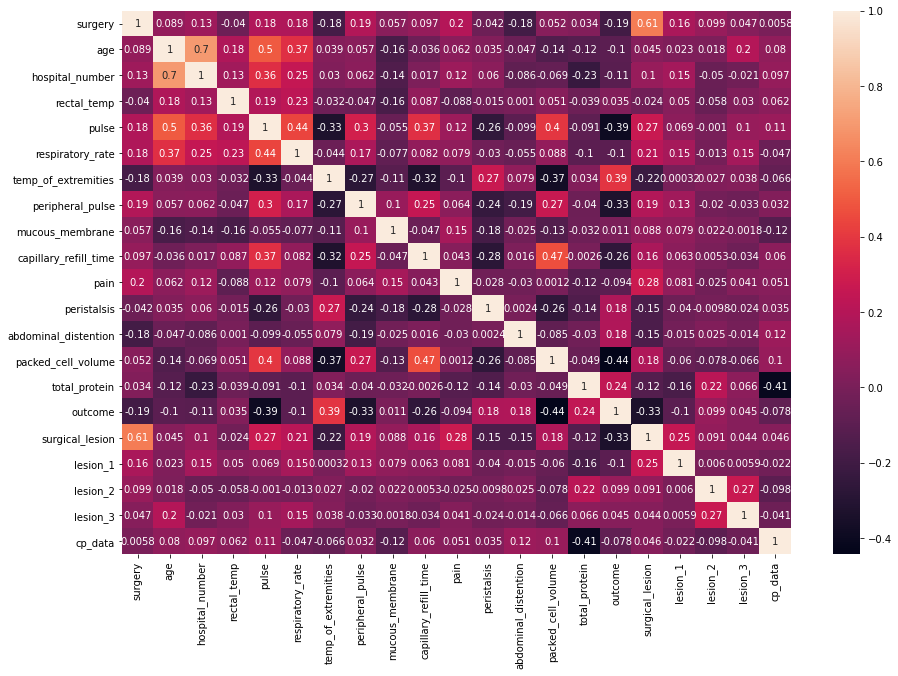

In [266]:
correlation_data = horse_data.corr()
plt.subplots(figsize=(15,10))
sns.heatmap(correlation_data, annot=True)
plt.show()

Arranging columns according to their correlation with outcome variable in descending order

In [267]:
correlation_values = correlation_data['outcome'].sort_values(ascending=False)
correlation_values = abs(correlation_values).sort_values(ascending=False)
print("Correlation of Features wrt Outcome")
print(abs(correlation_values).sort_values(ascending=False))

Correlation of Features wrt Outcome
outcome                  1.000000
packed_cell_volume       0.442790
temp_of_extremities      0.390457
pulse                    0.389403
surgical_lesion          0.332933
peripheral_pulse         0.326043
capillary_refill_time    0.261947
total_protein            0.244050
surgery                  0.189222
abdominal_distention     0.184764
peristalsis              0.181793
hospital_number          0.106396
respiratory_rate         0.103874
age                      0.101782
lesion_1                 0.100738
lesion_2                 0.098993
pain                     0.093630
cp_data                  0.078066
lesion_3                 0.044631
rectal_temp              0.035336
mucous_membrane          0.011042
Name: outcome, dtype: float64


### Removing features having very less correlation with outcome

In [268]:
for col in range(len(correlation_values)):
    if abs(correlation_values[col]) < 0.25:
        horse_data = horse_data.drop([correlation_values.index[col]], axis=1)

In [269]:
horse_data

,pulse,temp_of_extremities,peripheral_pulse,capillary_refill_time,packed_cell_volume,outcome,surgical_lesion
0,66.0,1,3,2,45.0,0,0
1,88.0,1,3,1,50.0,1,0
2,40.0,2,2,1,33.0,2,0
3,164.0,0,2,2,48.0,0,1
4,104.0,1,3,2,74.0,0,0
...,...,...,...,...,...,...,...
294,120.0,0,3,2,55.0,1,0
295,72.0,1,1,2,44.0,1,1
296,72.0,0,3,1,60.0,0,1
297,100.0,1,3,1,50.0,2,1


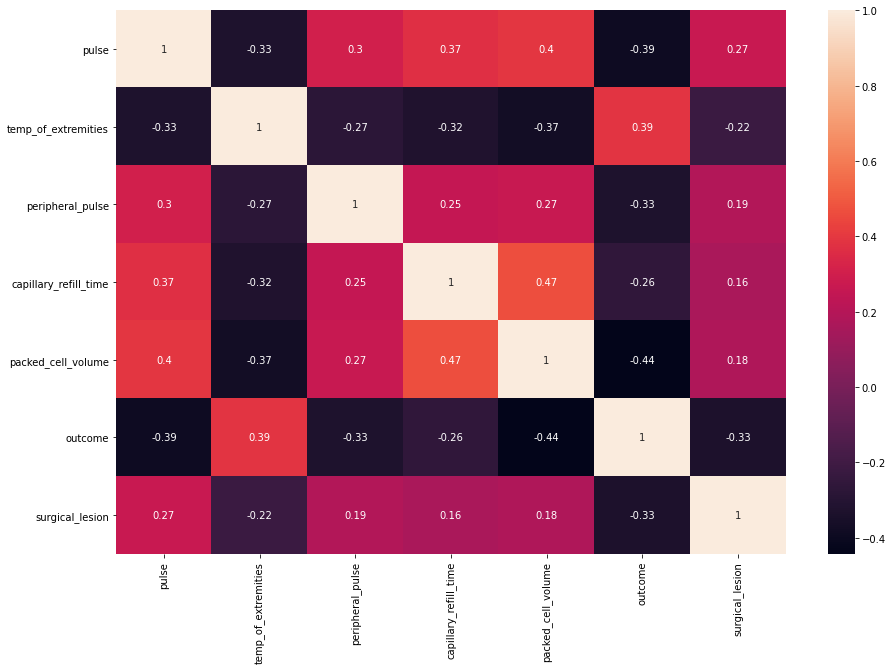

In [270]:
plt.subplots(figsize=(15,10))
sns.heatmap(horse_data.corr(), annot=True)
plt.show()

### Histograms 

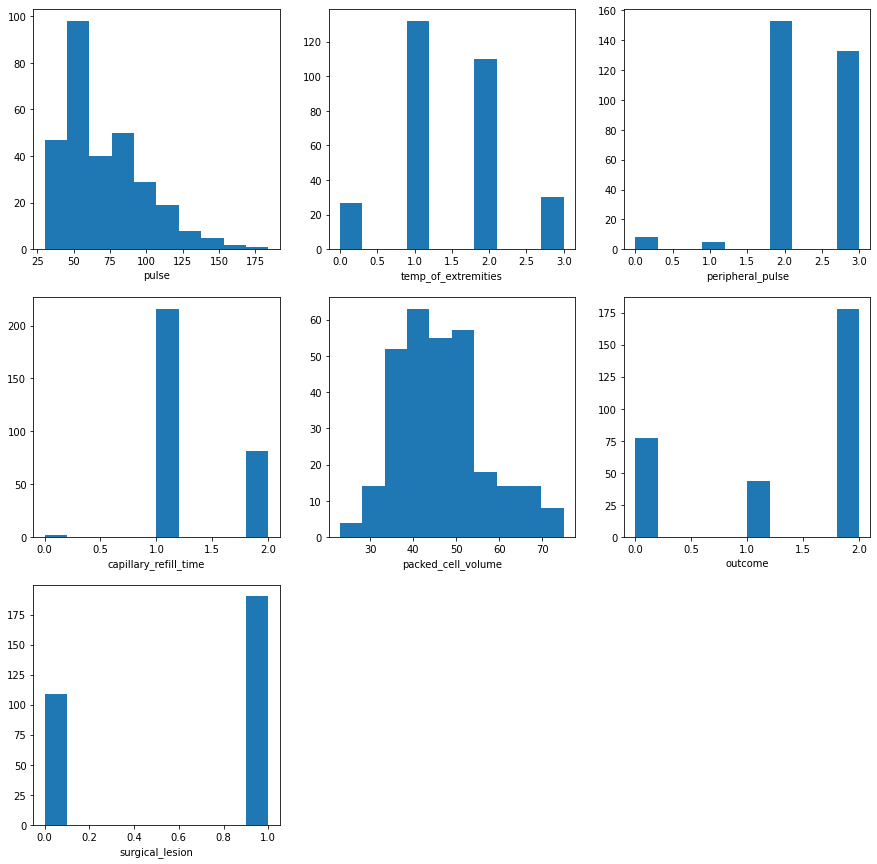

In [271]:
plt.figure(figsize=(15,15))
col = horse_data.columns
for i in range(0,len(col)):
    plt.subplot(len(col)//2,3,i+1)
    plt.hist(horse_data[col[i]]);
    plt.xlabel(col[i])

Number of samples per class

In [272]:
horse_data['outcome'].value_counts()

2    178
0     77
1     44
Name: outcome, dtype: int64

## 4. Data Partition (80% for training and 20% for testing) (Use scikit-learn)

In [273]:
X = horse_data.drop(columns='outcome')
Y = horse_data[['outcome']]
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=1)
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test= scaler.transform(X_test)

## 5. Build the model (use scikit learn)

In [274]:
regression_model = LogisticRegression(multi_class='multinomial')
regression_model.fit(X_train, y_train)

LogisticRegression(multi_class='multinomial')

## 6. Summarize the model. 

In [275]:
regression_model.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'multinomial',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

## 8. Evaluate the model

## Test Accuracy

In [276]:
print(f"Test Accuracy: {round(accuracy_score(y_test, y_pred) * 100,3)} %" )

Test Accuracy: 75.0 %


## Confusion Matrix

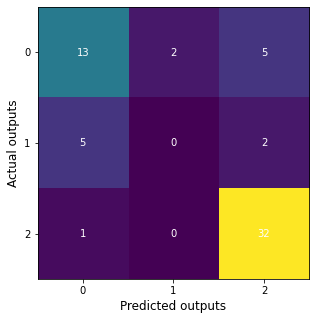

In [277]:
cm = confusion_matrix(y_test, y_pred)

fig, ax = plt.subplots(figsize=(5, 5))
ax.imshow(cm)
ax.grid(False)
ax.set_xlabel('Predicted outputs', fontsize=12, color='black')
ax.set_ylabel('Actual outputs', fontsize=12, color='black')
ax.xaxis.set(ticks=range(3))
ax.yaxis.set(ticks=range(3))
for i in range(3):
    for j in range(3):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='white')
plt.show()

## Classification Report

In [278]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.68      0.65      0.67        20
           1       0.00      0.00      0.00         7
           2       0.82      0.97      0.89        33

    accuracy                           0.75        60
   macro avg       0.50      0.54      0.52        60
weighted avg       0.68      0.75      0.71        60



## ROC Curve and AUC for each Class

In [279]:
y_prob = regression_model.predict_proba(X_test)

n_classes = len(regression_model.classes_)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test, y_prob[:, i], pos_label=i)
    roc_auc[i] = auc(fpr[i], tpr[i])

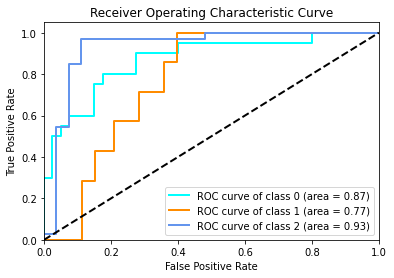

In [217]:
# plotting 
lw = 2   
colors = cycle(["aqua", "darkorange", "cornflowerblue"])
for i, color in zip(range(n_classes), colors):
    plt.plot(
        fpr[i],
        tpr[i],
        color=color,
        lw=lw,
        label="ROC curve of class {0} (area = {1:0.2f})".format(i, roc_auc[i]),
    )
plt.plot([0, 1], [0, 1], "k--", lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic Curve")
plt.legend(loc="lower right")
plt.show()

The 'lived' class has the highest Area Under Curve (AUC) of 0.93 followed by class 'died' (AUC = 0.87) and class 'euthanized (AUC = 0.77)

## 9. Tuning the model

In [280]:
LR = LogisticRegression(multi_class='multinomial')
LRparam_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
    'penalty': ['l1', 'l2', 'elasticnet'],
    'max_iter': list(range(100,800,100)),
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
}


In [281]:
LR_search = GridSearchCV(LR, param_grid=LRparam_grid, verbose = 3, cv=5)

# fitting the model for grid search 
LR_search.fit(X , Y)

Fitting 5 folds for each of 735 candidates, totalling 3675 fits
[CV 1/5] END C=0.001, max_iter=100, penalty=l1, solver=newton-cg; total time=   0.0s
[CV 2/5] END C=0.001, max_iter=100, penalty=l1, solver=newton-cg; total time=   0.0s
[CV 3/5] END C=0.001, max_iter=100, penalty=l1, solver=newton-cg; total time=   0.0s
[CV 4/5] END C=0.001, max_iter=100, penalty=l1, solver=newton-cg; total time=   0.0s
[CV 5/5] END C=0.001, max_iter=100, penalty=l1, solver=newton-cg; total time=   0.0s
[CV 1/5] END C=0.001, max_iter=100, penalty=l1, solver=lbfgs; total time=   0.0s
[CV 2/5] END C=0.001, max_iter=100, penalty=l1, solver=lbfgs; total time=   0.0s
[CV 3/5] END C=0.001, max_iter=100, penalty=l1, solver=lbfgs; total time=   0.0s
[CV 4/5] END C=0.001, max_iter=100, penalty=l1, solver=lbfgs; total time=   0.0s
[CV 5/5] END C=0.001, max_iter=100, penalty=l1, solver=lbfgs; total time=   0.0s
[CV 1/5] END C=0.001, max_iter=100, penalty=l1, solver=liblinear; total time=   0.0s
[CV 2/5] END C=0.001,

[CV 4/5] END .C=0.001, max_iter=200, penalty=l1, solver=saga; total time=   0.0s
[CV 5/5] END .C=0.001, max_iter=200, penalty=l1, solver=saga; total time=   0.0s
[CV 1/5] END C=0.001, max_iter=200, penalty=l2, solver=newton-cg; total time=   0.0s
[CV 2/5] END C=0.001, max_iter=200, penalty=l2, solver=newton-cg; total time=   0.0s
[CV 3/5] END C=0.001, max_iter=200, penalty=l2, solver=newton-cg; total time=   0.0s
[CV 4/5] END C=0.001, max_iter=200, penalty=l2, solver=newton-cg; total time=   0.0s
[CV 5/5] END C=0.001, max_iter=200, penalty=l2, solver=newton-cg; total time=   0.0s
[CV 1/5] END C=0.001, max_iter=200, penalty=l2, solver=lbfgs; total time=   0.0s
[CV 2/5] END C=0.001, max_iter=200, penalty=l2, solver=lbfgs; total time=   0.0s
[CV 3/5] END C=0.001, max_iter=200, penalty=l2, solver=lbfgs; total time=   0.0s
[CV 4/5] END C=0.001, max_iter=200, penalty=l2, solver=lbfgs; total time=   0.0s
[CV 5/5] END C=0.001, max_iter=200, penalty=l2, solver=lbfgs; total time=   0.0s
[CV 1/5]

[CV 4/5] END .C=0.001, max_iter=300, penalty=l2, solver=saga; total time=   0.0s
[CV 5/5] END .C=0.001, max_iter=300, penalty=l2, solver=saga; total time=   0.0s
[CV 1/5] END C=0.001, max_iter=300, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV 2/5] END C=0.001, max_iter=300, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV 3/5] END C=0.001, max_iter=300, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV 4/5] END C=0.001, max_iter=300, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV 5/5] END C=0.001, max_iter=300, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV 1/5] END C=0.001, max_iter=300, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV 2/5] END C=0.001, max_iter=300, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV 3/5] END C=0.001, max_iter=300, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV 4/5] END C=0.001, max_iter=300, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV 5/5] END C=0.

[CV 1/5] END .C=0.001, max_iter=500, penalty=l1, solver=saga; total time=   0.0s
[CV 2/5] END .C=0.001, max_iter=500, penalty=l1, solver=saga; total time=   0.0s
[CV 3/5] END .C=0.001, max_iter=500, penalty=l1, solver=saga; total time=   0.0s
[CV 4/5] END .C=0.001, max_iter=500, penalty=l1, solver=saga; total time=   0.0s
[CV 5/5] END .C=0.001, max_iter=500, penalty=l1, solver=saga; total time=   0.0s
[CV 1/5] END C=0.001, max_iter=500, penalty=l2, solver=newton-cg; total time=   0.0s
[CV 2/5] END C=0.001, max_iter=500, penalty=l2, solver=newton-cg; total time=   0.0s
[CV 3/5] END C=0.001, max_iter=500, penalty=l2, solver=newton-cg; total time=   0.0s
[CV 4/5] END C=0.001, max_iter=500, penalty=l2, solver=newton-cg; total time=   0.0s
[CV 5/5] END C=0.001, max_iter=500, penalty=l2, solver=newton-cg; total time=   0.0s
[CV 1/5] END C=0.001, max_iter=500, penalty=l2, solver=lbfgs; total time=   0.0s
[CV 2/5] END C=0.001, max_iter=500, penalty=l2, solver=lbfgs; total time=   0.0s
[CV 3/5]

[CV 3/5] END ..C=0.001, max_iter=600, penalty=l2, solver=sag; total time=   0.0s
[CV 4/5] END ..C=0.001, max_iter=600, penalty=l2, solver=sag; total time=   0.0s
[CV 5/5] END ..C=0.001, max_iter=600, penalty=l2, solver=sag; total time=   0.0s
[CV 1/5] END .C=0.001, max_iter=600, penalty=l2, solver=saga; total time=   0.0s
[CV 2/5] END .C=0.001, max_iter=600, penalty=l2, solver=saga; total time=   0.0s
[CV 3/5] END .C=0.001, max_iter=600, penalty=l2, solver=saga; total time=   0.0s
[CV 4/5] END .C=0.001, max_iter=600, penalty=l2, solver=saga; total time=   0.0s
[CV 5/5] END .C=0.001, max_iter=600, penalty=l2, solver=saga; total time=   0.0s
[CV 1/5] END C=0.001, max_iter=600, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV 2/5] END C=0.001, max_iter=600, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV 3/5] END C=0.001, max_iter=600, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV 4/5] END C=0.001, max_iter=600, penalty=elasticnet, solver=newton-cg;

[CV 1/5] END C=0.001, max_iter=700, penalty=elasticnet, solver=saga; total time=   0.0s
[CV 2/5] END C=0.001, max_iter=700, penalty=elasticnet, solver=saga; total time=   0.0s
[CV 3/5] END C=0.001, max_iter=700, penalty=elasticnet, solver=saga; total time=   0.0s
[CV 4/5] END C=0.001, max_iter=700, penalty=elasticnet, solver=saga; total time=   0.0s
[CV 5/5] END C=0.001, max_iter=700, penalty=elasticnet, solver=saga; total time=   0.0s
[CV 1/5] END C=0.01, max_iter=100, penalty=l1, solver=newton-cg; total time=   0.0s
[CV 2/5] END C=0.01, max_iter=100, penalty=l1, solver=newton-cg; total time=   0.0s
[CV 3/5] END C=0.01, max_iter=100, penalty=l1, solver=newton-cg; total time=   0.0s
[CV 4/5] END C=0.01, max_iter=100, penalty=l1, solver=newton-cg; total time=   0.0s
[CV 5/5] END C=0.01, max_iter=100, penalty=l1, solver=newton-cg; total time=   0.0s
[CV 1/5] END .C=0.01, max_iter=100, penalty=l1, solver=lbfgs; total time=   0.0s
[CV 2/5] END .C=0.01, max_iter=100, penalty=l1, solver=lbfg

[CV 2/5] END ..C=0.01, max_iter=200, penalty=l1, solver=saga; total time=   0.0s
[CV 3/5] END ..C=0.01, max_iter=200, penalty=l1, solver=saga; total time=   0.0s
[CV 4/5] END ..C=0.01, max_iter=200, penalty=l1, solver=saga; total time=   0.0s
[CV 5/5] END ..C=0.01, max_iter=200, penalty=l1, solver=saga; total time=   0.0s
[CV 1/5] END C=0.01, max_iter=200, penalty=l2, solver=newton-cg; total time=   0.0s
[CV 2/5] END C=0.01, max_iter=200, penalty=l2, solver=newton-cg; total time=   0.0s
[CV 3/5] END C=0.01, max_iter=200, penalty=l2, solver=newton-cg; total time=   0.0s
[CV 4/5] END C=0.01, max_iter=200, penalty=l2, solver=newton-cg; total time=   0.0s
[CV 5/5] END C=0.01, max_iter=200, penalty=l2, solver=newton-cg; total time=   0.0s
[CV 1/5] END .C=0.01, max_iter=200, penalty=l2, solver=lbfgs; total time=   0.0s
[CV 2/5] END .C=0.01, max_iter=200, penalty=l2, solver=lbfgs; total time=   0.0s
[CV 3/5] END .C=0.01, max_iter=200, penalty=l2, solver=lbfgs; total time=   0.0s
[CV 4/5] END 

[CV 4/5] END ..C=0.01, max_iter=300, penalty=l2, solver=saga; total time=   0.0s
[CV 5/5] END ..C=0.01, max_iter=300, penalty=l2, solver=saga; total time=   0.0s
[CV 1/5] END C=0.01, max_iter=300, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV 2/5] END C=0.01, max_iter=300, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV 3/5] END C=0.01, max_iter=300, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV 4/5] END C=0.01, max_iter=300, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV 5/5] END C=0.01, max_iter=300, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV 1/5] END C=0.01, max_iter=300, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV 2/5] END C=0.01, max_iter=300, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV 3/5] END C=0.01, max_iter=300, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV 4/5] END C=0.01, max_iter=300, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV 5/5] END C=0.01, max_i

[CV 5/5] END .C=0.01, max_iter=500, penalty=l1, solver=lbfgs; total time=   0.0s
[CV 1/5] END C=0.01, max_iter=500, penalty=l1, solver=liblinear; total time=   0.0s
[CV 2/5] END C=0.01, max_iter=500, penalty=l1, solver=liblinear; total time=   0.0s
[CV 3/5] END C=0.01, max_iter=500, penalty=l1, solver=liblinear; total time=   0.0s
[CV 4/5] END C=0.01, max_iter=500, penalty=l1, solver=liblinear; total time=   0.0s
[CV 5/5] END C=0.01, max_iter=500, penalty=l1, solver=liblinear; total time=   0.0s
[CV 1/5] END ...C=0.01, max_iter=500, penalty=l1, solver=sag; total time=   0.0s
[CV 2/5] END ...C=0.01, max_iter=500, penalty=l1, solver=sag; total time=   0.0s
[CV 3/5] END ...C=0.01, max_iter=500, penalty=l1, solver=sag; total time=   0.0s
[CV 4/5] END ...C=0.01, max_iter=500, penalty=l1, solver=sag; total time=   0.0s
[CV 5/5] END ...C=0.01, max_iter=500, penalty=l1, solver=sag; total time=   0.0s
[CV 1/5] END ..C=0.01, max_iter=500, penalty=l1, solver=saga; total time=   0.0s
[CV 2/5] END 

[CV 4/5] END .C=0.01, max_iter=600, penalty=l2, solver=lbfgs; total time=   0.1s
[CV 5/5] END .C=0.01, max_iter=600, penalty=l2, solver=lbfgs; total time=   0.0s
[CV 1/5] END C=0.01, max_iter=600, penalty=l2, solver=liblinear; total time=   0.0s
[CV 2/5] END C=0.01, max_iter=600, penalty=l2, solver=liblinear; total time=   0.0s
[CV 3/5] END C=0.01, max_iter=600, penalty=l2, solver=liblinear; total time=   0.0s
[CV 4/5] END C=0.01, max_iter=600, penalty=l2, solver=liblinear; total time=   0.0s
[CV 5/5] END C=0.01, max_iter=600, penalty=l2, solver=liblinear; total time=   0.0s
[CV 1/5] END ...C=0.01, max_iter=600, penalty=l2, solver=sag; total time=   0.0s
[CV 2/5] END ...C=0.01, max_iter=600, penalty=l2, solver=sag; total time=   0.0s
[CV 3/5] END ...C=0.01, max_iter=600, penalty=l2, solver=sag; total time=   0.0s
[CV 4/5] END ...C=0.01, max_iter=600, penalty=l2, solver=sag; total time=   0.0s
[CV 5/5] END ...C=0.01, max_iter=600, penalty=l2, solver=sag; total time=   0.0s
[CV 1/5] END 

[CV 3/5] END C=0.01, max_iter=700, penalty=elasticnet, solver=sag; total time=   0.0s
[CV 4/5] END C=0.01, max_iter=700, penalty=elasticnet, solver=sag; total time=   0.0s
[CV 5/5] END C=0.01, max_iter=700, penalty=elasticnet, solver=sag; total time=   0.0s
[CV 1/5] END C=0.01, max_iter=700, penalty=elasticnet, solver=saga; total time=   0.0s
[CV 2/5] END C=0.01, max_iter=700, penalty=elasticnet, solver=saga; total time=   0.0s
[CV 3/5] END C=0.01, max_iter=700, penalty=elasticnet, solver=saga; total time=   0.0s
[CV 4/5] END C=0.01, max_iter=700, penalty=elasticnet, solver=saga; total time=   0.0s
[CV 5/5] END C=0.01, max_iter=700, penalty=elasticnet, solver=saga; total time=   0.0s
[CV 1/5] END C=0.1, max_iter=100, penalty=l1, solver=newton-cg; total time=   0.0s
[CV 2/5] END C=0.1, max_iter=100, penalty=l1, solver=newton-cg; total time=   0.0s
[CV 3/5] END C=0.1, max_iter=100, penalty=l1, solver=newton-cg; total time=   0.0s
[CV 4/5] END C=0.1, max_iter=100, penalty=l1, solver=newto

[CV 2/5] END ...C=0.1, max_iter=200, penalty=l1, solver=saga; total time=   0.0s
[CV 3/5] END ...C=0.1, max_iter=200, penalty=l1, solver=saga; total time=   0.0s
[CV 4/5] END ...C=0.1, max_iter=200, penalty=l1, solver=saga; total time=   0.0s
[CV 5/5] END ...C=0.1, max_iter=200, penalty=l1, solver=saga; total time=   0.0s
[CV 1/5] END C=0.1, max_iter=200, penalty=l2, solver=newton-cg; total time=   0.0s
[CV 2/5] END C=0.1, max_iter=200, penalty=l2, solver=newton-cg; total time=   0.0s
[CV 3/5] END C=0.1, max_iter=200, penalty=l2, solver=newton-cg; total time=   0.0s
[CV 4/5] END C=0.1, max_iter=200, penalty=l2, solver=newton-cg; total time=   0.0s
[CV 5/5] END C=0.1, max_iter=200, penalty=l2, solver=newton-cg; total time=   0.0s
[CV 1/5] END ..C=0.1, max_iter=200, penalty=l2, solver=lbfgs; total time=   0.0s
[CV 2/5] END ..C=0.1, max_iter=200, penalty=l2, solver=lbfgs; total time=   0.0s
[CV 3/5] END ..C=0.1, max_iter=200, penalty=l2, solver=lbfgs; total time=   0.0s
[CV 4/5] END ..C=0

[CV 3/5] END ...C=0.1, max_iter=300, penalty=l2, solver=saga; total time=   0.0s
[CV 4/5] END ...C=0.1, max_iter=300, penalty=l2, solver=saga; total time=   0.0s
[CV 5/5] END ...C=0.1, max_iter=300, penalty=l2, solver=saga; total time=   0.0s
[CV 1/5] END C=0.1, max_iter=300, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV 2/5] END C=0.1, max_iter=300, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV 3/5] END C=0.1, max_iter=300, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV 4/5] END C=0.1, max_iter=300, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV 5/5] END C=0.1, max_iter=300, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV 1/5] END C=0.1, max_iter=300, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV 2/5] END C=0.1, max_iter=300, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV 3/5] END C=0.1, max_iter=300, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV 4/5] END C=0.1, max_iter=300, penalty

[CV 2/5] END ....C=0.1, max_iter=500, penalty=l1, solver=sag; total time=   0.0s
[CV 3/5] END ....C=0.1, max_iter=500, penalty=l1, solver=sag; total time=   0.0s
[CV 4/5] END ....C=0.1, max_iter=500, penalty=l1, solver=sag; total time=   0.0s
[CV 5/5] END ....C=0.1, max_iter=500, penalty=l1, solver=sag; total time=   0.0s
[CV 1/5] END ...C=0.1, max_iter=500, penalty=l1, solver=saga; total time=   0.0s
[CV 2/5] END ...C=0.1, max_iter=500, penalty=l1, solver=saga; total time=   0.0s
[CV 3/5] END ...C=0.1, max_iter=500, penalty=l1, solver=saga; total time=   0.0s
[CV 4/5] END ...C=0.1, max_iter=500, penalty=l1, solver=saga; total time=   0.0s
[CV 5/5] END ...C=0.1, max_iter=500, penalty=l1, solver=saga; total time=   0.0s
[CV 1/5] END C=0.1, max_iter=500, penalty=l2, solver=newton-cg; total time=   0.0s
[CV 2/5] END C=0.1, max_iter=500, penalty=l2, solver=newton-cg; total time=   0.0s
[CV 3/5] END C=0.1, max_iter=500, penalty=l2, solver=newton-cg; total time=   0.0s
[CV 4/5] END C=0.1, ma

[CV 3/5] END ....C=0.1, max_iter=600, penalty=l2, solver=sag; total time=   0.0s
[CV 4/5] END ....C=0.1, max_iter=600, penalty=l2, solver=sag; total time=   0.0s
[CV 5/5] END ....C=0.1, max_iter=600, penalty=l2, solver=sag; total time=   0.0s
[CV 1/5] END ...C=0.1, max_iter=600, penalty=l2, solver=saga; total time=   0.0s
[CV 2/5] END ...C=0.1, max_iter=600, penalty=l2, solver=saga; total time=   0.0s
[CV 3/5] END ...C=0.1, max_iter=600, penalty=l2, solver=saga; total time=   0.0s
[CV 4/5] END ...C=0.1, max_iter=600, penalty=l2, solver=saga; total time=   0.0s
[CV 5/5] END ...C=0.1, max_iter=600, penalty=l2, solver=saga; total time=   0.0s
[CV 1/5] END C=0.1, max_iter=600, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV 2/5] END C=0.1, max_iter=600, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV 3/5] END C=0.1, max_iter=600, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV 4/5] END C=0.1, max_iter=600, penalty=elasticnet, solver=newton-cg; total t

[CV 3/5] END ......C=1, max_iter=100, penalty=l1, solver=sag; total time=   0.0s
[CV 4/5] END ......C=1, max_iter=100, penalty=l1, solver=sag; total time=   0.0s
[CV 5/5] END ......C=1, max_iter=100, penalty=l1, solver=sag; total time=   0.0s
[CV 1/5] END .....C=1, max_iter=100, penalty=l1, solver=saga; total time=   0.0s
[CV 2/5] END .....C=1, max_iter=100, penalty=l1, solver=saga; total time=   0.0s
[CV 3/5] END .....C=1, max_iter=100, penalty=l1, solver=saga; total time=   0.0s
[CV 4/5] END .....C=1, max_iter=100, penalty=l1, solver=saga; total time=   0.0s
[CV 5/5] END .....C=1, max_iter=100, penalty=l1, solver=saga; total time=   0.0s
[CV 1/5] END C=1, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.0s
[CV 2/5] END C=1, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.0s
[CV 3/5] END C=1, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.0s
[CV 4/5] END C=1, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.0s
[CV 5/5] END C=1, max_iter=1

[CV 2/5] END .....C=1, max_iter=200, penalty=l2, solver=saga; total time=   0.0s
[CV 3/5] END .....C=1, max_iter=200, penalty=l2, solver=saga; total time=   0.0s
[CV 4/5] END .....C=1, max_iter=200, penalty=l2, solver=saga; total time=   0.0s
[CV 5/5] END .....C=1, max_iter=200, penalty=l2, solver=saga; total time=   0.0s
[CV 1/5] END C=1, max_iter=200, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV 2/5] END C=1, max_iter=200, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV 3/5] END C=1, max_iter=200, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV 4/5] END C=1, max_iter=200, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV 5/5] END C=1, max_iter=200, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV 1/5] END C=1, max_iter=200, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV 2/5] END C=1, max_iter=200, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV 3/5] END C=1, max_iter=200, penalty=elasticnet, solver=lb

[CV 4/5] END ....C=1, max_iter=400, penalty=l1, solver=lbfgs; total time=   0.0s
[CV 5/5] END ....C=1, max_iter=400, penalty=l1, solver=lbfgs; total time=   0.0s
[CV 1/5] END C=1, max_iter=400, penalty=l1, solver=liblinear; total time=   0.0s
[CV 2/5] END C=1, max_iter=400, penalty=l1, solver=liblinear; total time=   0.0s
[CV 3/5] END C=1, max_iter=400, penalty=l1, solver=liblinear; total time=   0.0s
[CV 4/5] END C=1, max_iter=400, penalty=l1, solver=liblinear; total time=   0.0s
[CV 5/5] END C=1, max_iter=400, penalty=l1, solver=liblinear; total time=   0.0s
[CV 1/5] END ......C=1, max_iter=400, penalty=l1, solver=sag; total time=   0.0s
[CV 2/5] END ......C=1, max_iter=400, penalty=l1, solver=sag; total time=   0.0s
[CV 3/5] END ......C=1, max_iter=400, penalty=l1, solver=sag; total time=   0.0s
[CV 4/5] END ......C=1, max_iter=400, penalty=l1, solver=sag; total time=   0.0s
[CV 5/5] END ......C=1, max_iter=400, penalty=l1, solver=sag; total time=   0.0s
[CV 1/5] END .....C=1, max_i

[CV 5/5] END ....C=1, max_iter=500, penalty=l2, solver=lbfgs; total time=   0.1s
[CV 1/5] END C=1, max_iter=500, penalty=l2, solver=liblinear; total time=   0.0s
[CV 2/5] END C=1, max_iter=500, penalty=l2, solver=liblinear; total time=   0.0s
[CV 3/5] END C=1, max_iter=500, penalty=l2, solver=liblinear; total time=   0.0s
[CV 4/5] END C=1, max_iter=500, penalty=l2, solver=liblinear; total time=   0.0s
[CV 5/5] END C=1, max_iter=500, penalty=l2, solver=liblinear; total time=   0.0s
[CV 1/5] END ......C=1, max_iter=500, penalty=l2, solver=sag; total time=   0.0s
[CV 2/5] END ......C=1, max_iter=500, penalty=l2, solver=sag; total time=   0.0s
[CV 3/5] END ......C=1, max_iter=500, penalty=l2, solver=sag; total time=   0.0s
[CV 4/5] END ......C=1, max_iter=500, penalty=l2, solver=sag; total time=   0.0s
[CV 5/5] END ......C=1, max_iter=500, penalty=l2, solver=sag; total time=   0.0s
[CV 1/5] END .....C=1, max_iter=500, penalty=l2, solver=saga; total time=   0.0s
[CV 2/5] END .....C=1, max_i

[CV 4/5] END ......C=1, max_iter=700, penalty=l1, solver=sag; total time=   0.0s
[CV 5/5] END ......C=1, max_iter=700, penalty=l1, solver=sag; total time=   0.0s
[CV 1/5] END .....C=1, max_iter=700, penalty=l1, solver=saga; total time=   0.0s
[CV 2/5] END .....C=1, max_iter=700, penalty=l1, solver=saga; total time=   0.0s
[CV 3/5] END .....C=1, max_iter=700, penalty=l1, solver=saga; total time=   0.0s
[CV 4/5] END .....C=1, max_iter=700, penalty=l1, solver=saga; total time=   0.0s
[CV 5/5] END .....C=1, max_iter=700, penalty=l1, solver=saga; total time=   0.0s
[CV 1/5] END C=1, max_iter=700, penalty=l2, solver=newton-cg; total time=   0.0s
[CV 2/5] END C=1, max_iter=700, penalty=l2, solver=newton-cg; total time=   0.0s
[CV 3/5] END C=1, max_iter=700, penalty=l2, solver=newton-cg; total time=   0.0s
[CV 4/5] END C=1, max_iter=700, penalty=l2, solver=newton-cg; total time=   0.0s
[CV 5/5] END C=1, max_iter=700, penalty=l2, solver=newton-cg; total time=   0.0s
[CV 1/5] END ....C=1, max_it

[CV 5/5] END .....C=10, max_iter=100, penalty=l2, solver=sag; total time=   0.0s
[CV 1/5] END ....C=10, max_iter=100, penalty=l2, solver=saga; total time=   0.0s
[CV 2/5] END ....C=10, max_iter=100, penalty=l2, solver=saga; total time=   0.0s
[CV 3/5] END ....C=10, max_iter=100, penalty=l2, solver=saga; total time=   0.0s
[CV 4/5] END ....C=10, max_iter=100, penalty=l2, solver=saga; total time=   0.0s
[CV 5/5] END ....C=10, max_iter=100, penalty=l2, solver=saga; total time=   0.0s
[CV 1/5] END C=10, max_iter=100, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV 2/5] END C=10, max_iter=100, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV 3/5] END C=10, max_iter=100, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV 4/5] END C=10, max_iter=100, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV 5/5] END C=10, max_iter=100, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV 1/5] END C=10, max_iter=100, penalty=elasticnet, solver=lbfg

[CV 2/5] END C=10, max_iter=300, penalty=l1, solver=newton-cg; total time=   0.0s
[CV 3/5] END C=10, max_iter=300, penalty=l1, solver=newton-cg; total time=   0.0s
[CV 4/5] END C=10, max_iter=300, penalty=l1, solver=newton-cg; total time=   0.0s
[CV 5/5] END C=10, max_iter=300, penalty=l1, solver=newton-cg; total time=   0.0s
[CV 1/5] END ...C=10, max_iter=300, penalty=l1, solver=lbfgs; total time=   0.0s
[CV 2/5] END ...C=10, max_iter=300, penalty=l1, solver=lbfgs; total time=   0.0s
[CV 3/5] END ...C=10, max_iter=300, penalty=l1, solver=lbfgs; total time=   0.0s
[CV 4/5] END ...C=10, max_iter=300, penalty=l1, solver=lbfgs; total time=   0.0s
[CV 5/5] END ...C=10, max_iter=300, penalty=l1, solver=lbfgs; total time=   0.0s
[CV 1/5] END C=10, max_iter=300, penalty=l1, solver=liblinear; total time=   0.0s
[CV 2/5] END C=10, max_iter=300, penalty=l1, solver=liblinear; total time=   0.0s
[CV 3/5] END C=10, max_iter=300, penalty=l1, solver=liblinear; total time=   0.0s
[CV 4/5] END C=10, ma

[CV 2/5] END C=10, max_iter=400, penalty=l2, solver=newton-cg; total time=   0.0s
[CV 3/5] END C=10, max_iter=400, penalty=l2, solver=newton-cg; total time=   0.0s
[CV 4/5] END C=10, max_iter=400, penalty=l2, solver=newton-cg; total time=   0.0s
[CV 5/5] END C=10, max_iter=400, penalty=l2, solver=newton-cg; total time=   0.0s
[CV 1/5] END ...C=10, max_iter=400, penalty=l2, solver=lbfgs; total time=   0.2s
[CV 2/5] END ...C=10, max_iter=400, penalty=l2, solver=lbfgs; total time=   0.1s
[CV 3/5] END ...C=10, max_iter=400, penalty=l2, solver=lbfgs; total time=   0.1s
[CV 4/5] END ...C=10, max_iter=400, penalty=l2, solver=lbfgs; total time=   0.1s
[CV 5/5] END ...C=10, max_iter=400, penalty=l2, solver=lbfgs; total time=   0.1s
[CV 1/5] END C=10, max_iter=400, penalty=l2, solver=liblinear; total time=   0.0s
[CV 2/5] END C=10, max_iter=400, penalty=l2, solver=liblinear; total time=   0.0s
[CV 3/5] END C=10, max_iter=400, penalty=l2, solver=liblinear; total time=   0.0s
[CV 4/5] END C=10, ma

[CV 1/5] END C=10, max_iter=600, penalty=l1, solver=newton-cg; total time=   0.0s
[CV 2/5] END C=10, max_iter=600, penalty=l1, solver=newton-cg; total time=   0.0s
[CV 3/5] END C=10, max_iter=600, penalty=l1, solver=newton-cg; total time=   0.0s
[CV 4/5] END C=10, max_iter=600, penalty=l1, solver=newton-cg; total time=   0.0s
[CV 5/5] END C=10, max_iter=600, penalty=l1, solver=newton-cg; total time=   0.0s
[CV 1/5] END ...C=10, max_iter=600, penalty=l1, solver=lbfgs; total time=   0.0s
[CV 2/5] END ...C=10, max_iter=600, penalty=l1, solver=lbfgs; total time=   0.0s
[CV 3/5] END ...C=10, max_iter=600, penalty=l1, solver=lbfgs; total time=   0.0s
[CV 4/5] END ...C=10, max_iter=600, penalty=l1, solver=lbfgs; total time=   0.0s
[CV 5/5] END ...C=10, max_iter=600, penalty=l1, solver=lbfgs; total time=   0.0s
[CV 1/5] END C=10, max_iter=600, penalty=l1, solver=liblinear; total time=   0.0s
[CV 2/5] END C=10, max_iter=600, penalty=l1, solver=liblinear; total time=   0.0s
[CV 3/5] END C=10, ma

[CV 5/5] END ....C=10, max_iter=700, penalty=l1, solver=saga; total time=   0.0s
[CV 1/5] END C=10, max_iter=700, penalty=l2, solver=newton-cg; total time=   0.0s
[CV 2/5] END C=10, max_iter=700, penalty=l2, solver=newton-cg; total time=   0.0s
[CV 3/5] END C=10, max_iter=700, penalty=l2, solver=newton-cg; total time=   0.0s
[CV 4/5] END C=10, max_iter=700, penalty=l2, solver=newton-cg; total time=   0.0s
[CV 5/5] END C=10, max_iter=700, penalty=l2, solver=newton-cg; total time=   0.0s
[CV 1/5] END ...C=10, max_iter=700, penalty=l2, solver=lbfgs; total time=   0.3s
[CV 2/5] END ...C=10, max_iter=700, penalty=l2, solver=lbfgs; total time=   0.3s
[CV 3/5] END ...C=10, max_iter=700, penalty=l2, solver=lbfgs; total time=   0.2s
[CV 4/5] END ...C=10, max_iter=700, penalty=l2, solver=lbfgs; total time=   0.2s
[CV 5/5] END ...C=10, max_iter=700, penalty=l2, solver=lbfgs; total time=   0.2s
[CV 1/5] END C=10, max_iter=700, penalty=l2, solver=liblinear; total time=   0.0s
[CV 2/5] END C=10, max

[CV 2/5] END C=100, max_iter=100, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV 3/5] END C=100, max_iter=100, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV 4/5] END C=100, max_iter=100, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV 5/5] END C=100, max_iter=100, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV 1/5] END C=100, max_iter=100, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV 2/5] END C=100, max_iter=100, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV 3/5] END C=100, max_iter=100, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV 4/5] END C=100, max_iter=100, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV 5/5] END C=100, max_iter=100, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV 1/5] END C=100, max_iter=100, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV 2/5] END C=100, max_iter=100, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV 3/5] END C=100,

[CV 5/5] END C=100, max_iter=300, penalty=l1, solver=liblinear; total time=   0.0s
[CV 1/5] END ....C=100, max_iter=300, penalty=l1, solver=sag; total time=   0.0s
[CV 2/5] END ....C=100, max_iter=300, penalty=l1, solver=sag; total time=   0.0s
[CV 3/5] END ....C=100, max_iter=300, penalty=l1, solver=sag; total time=   0.0s
[CV 4/5] END ....C=100, max_iter=300, penalty=l1, solver=sag; total time=   0.0s
[CV 5/5] END ....C=100, max_iter=300, penalty=l1, solver=sag; total time=   0.0s
[CV 1/5] END ...C=100, max_iter=300, penalty=l1, solver=saga; total time=   0.0s
[CV 2/5] END ...C=100, max_iter=300, penalty=l1, solver=saga; total time=   0.0s
[CV 3/5] END ...C=100, max_iter=300, penalty=l1, solver=saga; total time=   0.0s
[CV 4/5] END ...C=100, max_iter=300, penalty=l1, solver=saga; total time=   0.0s
[CV 5/5] END ...C=100, max_iter=300, penalty=l1, solver=saga; total time=   0.0s
[CV 1/5] END C=100, max_iter=300, penalty=l2, solver=newton-cg; total time=   0.0s
[CV 2/5] END C=100, max_

[CV 3/5] END ....C=100, max_iter=400, penalty=l2, solver=sag; total time=   0.0s
[CV 4/5] END ....C=100, max_iter=400, penalty=l2, solver=sag; total time=   0.0s
[CV 5/5] END ....C=100, max_iter=400, penalty=l2, solver=sag; total time=   0.0s
[CV 1/5] END ...C=100, max_iter=400, penalty=l2, solver=saga; total time=   0.0s
[CV 2/5] END ...C=100, max_iter=400, penalty=l2, solver=saga; total time=   0.0s
[CV 3/5] END ...C=100, max_iter=400, penalty=l2, solver=saga; total time=   0.0s
[CV 4/5] END ...C=100, max_iter=400, penalty=l2, solver=saga; total time=   0.0s
[CV 5/5] END ...C=100, max_iter=400, penalty=l2, solver=saga; total time=   0.0s
[CV 1/5] END C=100, max_iter=400, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV 2/5] END C=100, max_iter=400, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV 3/5] END C=100, max_iter=400, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV 4/5] END C=100, max_iter=400, penalty=elasticnet, solver=newton-cg; total t

[CV 5/5] END C=100, max_iter=500, penalty=elasticnet, solver=saga; total time=   0.0s
[CV 1/5] END C=100, max_iter=600, penalty=l1, solver=newton-cg; total time=   0.0s
[CV 2/5] END C=100, max_iter=600, penalty=l1, solver=newton-cg; total time=   0.0s
[CV 3/5] END C=100, max_iter=600, penalty=l1, solver=newton-cg; total time=   0.0s
[CV 4/5] END C=100, max_iter=600, penalty=l1, solver=newton-cg; total time=   0.0s
[CV 5/5] END C=100, max_iter=600, penalty=l1, solver=newton-cg; total time=   0.0s
[CV 1/5] END ..C=100, max_iter=600, penalty=l1, solver=lbfgs; total time=   0.0s
[CV 2/5] END ..C=100, max_iter=600, penalty=l1, solver=lbfgs; total time=   0.0s
[CV 3/5] END ..C=100, max_iter=600, penalty=l1, solver=lbfgs; total time=   0.0s
[CV 4/5] END ..C=100, max_iter=600, penalty=l1, solver=lbfgs; total time=   0.0s
[CV 5/5] END ..C=100, max_iter=600, penalty=l1, solver=lbfgs; total time=   0.0s
[CV 1/5] END C=100, max_iter=600, penalty=l1, solver=liblinear; total time=   0.0s
[CV 2/5] EN

[CV 5/5] END ...C=100, max_iter=700, penalty=l1, solver=saga; total time=   0.0s
[CV 1/5] END C=100, max_iter=700, penalty=l2, solver=newton-cg; total time=   0.0s
[CV 2/5] END C=100, max_iter=700, penalty=l2, solver=newton-cg; total time=   0.0s
[CV 3/5] END C=100, max_iter=700, penalty=l2, solver=newton-cg; total time=   0.0s
[CV 4/5] END C=100, max_iter=700, penalty=l2, solver=newton-cg; total time=   0.0s
[CV 5/5] END C=100, max_iter=700, penalty=l2, solver=newton-cg; total time=   0.0s
[CV 1/5] END ..C=100, max_iter=700, penalty=l2, solver=lbfgs; total time=   0.3s
[CV 2/5] END ..C=100, max_iter=700, penalty=l2, solver=lbfgs; total time=   0.2s
[CV 3/5] END ..C=100, max_iter=700, penalty=l2, solver=lbfgs; total time=   0.3s
[CV 4/5] END ..C=100, max_iter=700, penalty=l2, solver=lbfgs; total time=   0.2s
[CV 5/5] END ..C=100, max_iter=700, penalty=l2, solver=lbfgs; total time=   0.2s
[CV 1/5] END C=100, max_iter=700, penalty=l2, solver=liblinear; total time=   0.0s
[CV 2/5] END C=1

[CV 1/5] END C=1000, max_iter=100, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV 2/5] END C=1000, max_iter=100, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV 3/5] END C=1000, max_iter=100, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV 4/5] END C=1000, max_iter=100, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV 5/5] END C=1000, max_iter=100, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV 1/5] END C=1000, max_iter=100, penalty=elasticnet, solver=sag; total time=   0.0s
[CV 2/5] END C=1000, max_iter=100, penalty=elasticnet, solver=sag; total time=   0.0s
[CV 3/5] END C=1000, max_iter=100, penalty=elasticnet, solver=sag; total time=   0.0s
[CV 4/5] END C=1000, max_iter=100, penalty=elasticnet, solver=sag; total time=   0.0s
[CV 5/5] END C=1000, max_iter=100, penalty=elasticnet, solver=sag; total time=   0.0s
[CV 1/5] END C=1000, max_iter=100, penalty=elasticnet, solver=saga; total time=   0.0s
[CV 2/5] END C=1000, ma

[CV 1/5] END ...C=1000, max_iter=300, penalty=l1, solver=sag; total time=   0.0s
[CV 2/5] END ...C=1000, max_iter=300, penalty=l1, solver=sag; total time=   0.0s
[CV 3/5] END ...C=1000, max_iter=300, penalty=l1, solver=sag; total time=   0.0s
[CV 4/5] END ...C=1000, max_iter=300, penalty=l1, solver=sag; total time=   0.0s
[CV 5/5] END ...C=1000, max_iter=300, penalty=l1, solver=sag; total time=   0.0s
[CV 1/5] END ..C=1000, max_iter=300, penalty=l1, solver=saga; total time=   0.0s
[CV 2/5] END ..C=1000, max_iter=300, penalty=l1, solver=saga; total time=   0.0s
[CV 3/5] END ..C=1000, max_iter=300, penalty=l1, solver=saga; total time=   0.0s
[CV 4/5] END ..C=1000, max_iter=300, penalty=l1, solver=saga; total time=   0.0s
[CV 5/5] END ..C=1000, max_iter=300, penalty=l1, solver=saga; total time=   0.0s
[CV 1/5] END C=1000, max_iter=300, penalty=l2, solver=newton-cg; total time=   0.0s
[CV 2/5] END C=1000, max_iter=300, penalty=l2, solver=newton-cg; total time=   0.0s
[CV 3/5] END C=1000, m

[CV 3/5] END ...C=1000, max_iter=400, penalty=l2, solver=sag; total time=   0.0s
[CV 4/5] END ...C=1000, max_iter=400, penalty=l2, solver=sag; total time=   0.0s
[CV 5/5] END ...C=1000, max_iter=400, penalty=l2, solver=sag; total time=   0.0s
[CV 1/5] END ..C=1000, max_iter=400, penalty=l2, solver=saga; total time=   0.0s
[CV 2/5] END ..C=1000, max_iter=400, penalty=l2, solver=saga; total time=   0.0s
[CV 3/5] END ..C=1000, max_iter=400, penalty=l2, solver=saga; total time=   0.0s
[CV 4/5] END ..C=1000, max_iter=400, penalty=l2, solver=saga; total time=   0.0s
[CV 5/5] END ..C=1000, max_iter=400, penalty=l2, solver=saga; total time=   0.0s
[CV 1/5] END C=1000, max_iter=400, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV 2/5] END C=1000, max_iter=400, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV 3/5] END C=1000, max_iter=400, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV 4/5] END C=1000, max_iter=400, penalty=elasticnet, solver=newton-cg; tot

[CV 2/5] END C=1000, max_iter=600, penalty=l1, solver=newton-cg; total time=   0.0s
[CV 3/5] END C=1000, max_iter=600, penalty=l1, solver=newton-cg; total time=   0.0s
[CV 4/5] END C=1000, max_iter=600, penalty=l1, solver=newton-cg; total time=   0.0s
[CV 5/5] END C=1000, max_iter=600, penalty=l1, solver=newton-cg; total time=   0.0s
[CV 1/5] END .C=1000, max_iter=600, penalty=l1, solver=lbfgs; total time=   0.0s
[CV 2/5] END .C=1000, max_iter=600, penalty=l1, solver=lbfgs; total time=   0.0s
[CV 3/5] END .C=1000, max_iter=600, penalty=l1, solver=lbfgs; total time=   0.0s
[CV 4/5] END .C=1000, max_iter=600, penalty=l1, solver=lbfgs; total time=   0.0s
[CV 5/5] END .C=1000, max_iter=600, penalty=l1, solver=lbfgs; total time=   0.0s
[CV 1/5] END C=1000, max_iter=600, penalty=l1, solver=liblinear; total time=   0.0s
[CV 2/5] END C=1000, max_iter=600, penalty=l1, solver=liblinear; total time=   0.0s
[CV 3/5] END C=1000, max_iter=600, penalty=l1, solver=liblinear; total time=   0.0s
[CV 4/5

[CV 1/5] END C=1000, max_iter=700, penalty=l2, solver=newton-cg; total time=   0.0s
[CV 2/5] END C=1000, max_iter=700, penalty=l2, solver=newton-cg; total time=   0.0s
[CV 3/5] END C=1000, max_iter=700, penalty=l2, solver=newton-cg; total time=   0.0s
[CV 4/5] END C=1000, max_iter=700, penalty=l2, solver=newton-cg; total time=   0.0s
[CV 5/5] END C=1000, max_iter=700, penalty=l2, solver=newton-cg; total time=   0.0s
[CV 1/5] END .C=1000, max_iter=700, penalty=l2, solver=lbfgs; total time=   0.3s
[CV 2/5] END .C=1000, max_iter=700, penalty=l2, solver=lbfgs; total time=   0.3s
[CV 3/5] END .C=1000, max_iter=700, penalty=l2, solver=lbfgs; total time=   0.3s
[CV 4/5] END .C=1000, max_iter=700, penalty=l2, solver=lbfgs; total time=   0.2s
[CV 5/5] END .C=1000, max_iter=700, penalty=l2, solver=lbfgs; total time=   0.2s
[CV 1/5] END C=1000, max_iter=700, penalty=l2, solver=liblinear; total time=   0.0s
[CV 2/5] END C=1000, max_iter=700, penalty=l2, solver=liblinear; total time=   0.0s
[CV 3/5

GridSearchCV(cv=5, estimator=LogisticRegression(multi_class='multinomial'),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'max_iter': [100, 200, 300, 400, 500, 600, 700],
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']},
             verbose=3)

In [282]:
# summarize
print('Mean Accuracy: %.3f' % LR_search.best_score_)
print('Best Parameters: %s' % LR_search.best_params_)

Mean Accuracy: 0.682
Best Parameters: {'C': 10, 'max_iter': 100, 'penalty': 'l2', 'solver': 'lbfgs'}


In [283]:
LR_tuned = LogisticRegression(**LR_search.best_params_, multi_class='multinomial')

In [284]:
LR_tuned.fit(X_train, y_train)

LogisticRegression(C=10, multi_class='multinomial')

## Test Accuracy

In [285]:
print(f"Test Accuracy: {round(accuracy_score(y_test, y_pred) * 100,3)} %" )

Test Accuracy: 75.0 %


## Confusion Matrix

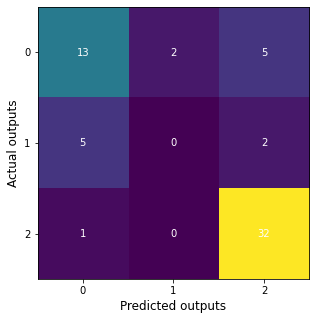

In [286]:
cm = confusion_matrix(y_test, y_pred)

fig, ax = plt.subplots(figsize=(5, 5))
ax.imshow(cm)
ax.grid(False)
ax.set_xlabel('Predicted outputs', fontsize=12, color='black')
ax.set_ylabel('Actual outputs', fontsize=12, color='black')
ax.xaxis.set(ticks=range(3))
ax.yaxis.set(ticks=range(3))
for i in range(3):
    for j in range(3):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='white')
plt.show()

## Classification Report

In [287]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.68      0.65      0.67        20
           1       0.00      0.00      0.00         7
           2       0.82      0.97      0.89        33

    accuracy                           0.75        60
   macro avg       0.50      0.54      0.52        60
weighted avg       0.68      0.75      0.71        60



## ROC Curve and AUC for each Class

In [288]:
y_prob = LR_tuned.predict_proba(X_test)

n_classes = len(LR_tuned.classes_)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test, y_prob[:, i], pos_label=i)
    roc_auc[i] = auc(fpr[i], tpr[i])

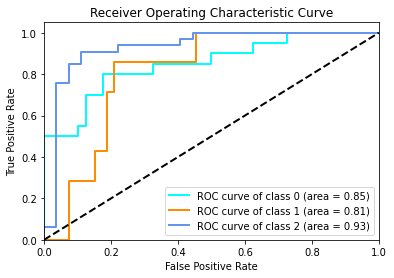

In [289]:
# plotting 
lw = 2   
colors = cycle(["aqua", "darkorange", "cornflowerblue"])
for i, color in zip(range(n_classes), colors):
    plt.plot(
        fpr[i],
        tpr[i],
        color=color,
        lw=lw,
        label="ROC curve of class {0} (area = {1:0.2f})".format(i, roc_auc[i]),
    )
plt.plot([0, 1], [0, 1], "k--", lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic Curve")
plt.legend(loc="lower right")
plt.show()

Conclusion: 
1. In The horse colic dataset, the median and mode imputation wrt outcome variable of null values in numerical and categorical column respectively was used.
2. The basline regression model gave the accuracy of 75% and then hyperparamerters tuning was performed to find the best parameters for the model. The accuracy of tuned model increased to 86.7%

# Part-C: Linear Regression

3)	Credit Score prediction – a Model to predict the probabilities of default. Use Linear Regression to predict the probabilities of default and assign credit to potential borrowers 

## 1. Load the dataset (Use pandas)


In [ ]:
credit_columns = ['status_checking_acc', 'duration', 'credit_history', 'purpose', 'credit_amount', 'savings_account_bonds', 
                  'present_employment', 'installment_rate', 'personal_status', 'guarantors', 'present_residence', 'property',
                  'age', 'other_installment', 'housing', 'no_of_credits', 'job', 'no_of_people_liable',
                  'telephone', 'foreign_worker', 'risk']


In [ ]:
credit_data = pd.read_csv('/content/drive/MyDrive/DS-Lab/Lab/Exp1/german.data', sep=" ", names=credit_columns, header=None)

In [ ]:
credit_data.head()

,status_checking_acc,duration,credit_history,purpose,credit_amount,savings_account_bonds,present_employment,installment_rate,personal_status,guarantors,present_residence,property,age,other_installment,housing,no_of_credits,job,no_of_people_liable,telephone,foreign_worker,risk
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,4,A121,67,A143,A152,2,A173,1,A192,A201,1
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,2,A121,22,A143,A152,1,A173,1,A191,A201,2
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,3,A121,49,A143,A152,1,A172,2,A191,A201,1
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,4,A122,45,A143,A153,1,A173,2,A191,A201,1
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,4,A124,53,A143,A153,2,A173,2,A191,A201,2


In [ ]:
credit_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   status_checking_acc    1000 non-null   object
 1   duration               1000 non-null   int64 
 2   credit_history         1000 non-null   object
 3   purpose                1000 non-null   object
 4   credit_amount          1000 non-null   int64 
 5   savings_account_bonds  1000 non-null   object
 6   present_employment     1000 non-null   object
 7   installment_rate       1000 non-null   int64 
 8   personal_status        1000 non-null   object
 9   guarantors             1000 non-null   object
 10  present_residence      1000 non-null   int64 
 11  property               1000 non-null   object
 12  age                    1000 non-null   int64 
 13  other_installment      1000 non-null   object
 14  housing                1000 non-null   object
 15  no_of_credits         

The above output shows the basic info about the dataset. The dataset consists of both categorical and numerical features. There are total 21 features and 1000 data samples.

## 2. Data Preprocessing (Handling NA values)

In [ ]:
# count of null values in each column
print(credit_data.isnull().sum())

status_checking_acc      0
duration                 0
credit_history           0
purpose                  0
credit_amount            0
savings_account_bonds    0
present_employment       0
installment_rate         0
personal_status          0
guarantors               0
present_residence        0
property                 0
age                      0
other_installment        0
housing                  0
no_of_credits            0
job                      0
no_of_people_liable      0
telephone                0
foreign_worker           0
risk                     0
dtype: int64


The above output shows that there are no null values present in the dataset.

In [ ]:
credit_data['risk'] = credit_data['risk'].map({1: 0, 2: 1})

Now risk value of 0 referes to Good and 1 refers to Bad

In [ ]:
credit_data

,status_checking_acc,duration,credit_history,purpose,credit_amount,savings_account_bonds,present_employment,installment_rate,personal_status,guarantors,present_residence,property,age,other_installment,housing,no_of_credits,job,no_of_people_liable,telephone,foreign_worker,risk
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,4,A121,67,A143,A152,2,A173,1,A192,A201,0
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,2,A121,22,A143,A152,1,A173,1,A191,A201,1
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,3,A121,49,A143,A152,1,A172,2,A191,A201,0
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,4,A122,45,A143,A153,1,A173,2,A191,A201,0
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,4,A124,53,A143,A153,2,A173,2,A191,A201,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,A14,12,A32,A42,1736,A61,A74,3,A92,A101,4,A121,31,A143,A152,1,A172,1,A191,A201,0
996,A11,30,A32,A41,3857,A61,A73,4,A91,A101,4,A122,40,A143,A152,1,A174,1,A192,A201,0
997,A14,12,A32,A43,804,A61,A75,4,A93,A101,4,A123,38,A143,A152,1,A173,1,A191,A201,0
998,A11,45,A32,A43,1845,A61,A73,4,A93,A101,4,A124,23,A143,A153,1,A173,1,A192,A201,1


### Dividing columns into categorical and numerical columns

In [ ]:
numerics = ['int8', 'int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numerical_columns = []
categorical_columns = []
features = credit_data.columns.values.tolist()
for col in features:
    if credit_data[col].dtype in numerics:
        numerical_columns.append(col)
    else:
        categorical_columns.append(col)
print("Numerical Columns: ", numerical_columns)

print("\nCategorical Columns: ", categorical_columns)

Numerical Columns:  ['duration', 'credit_amount', 'installment_rate', 'present_residence', 'age', 'no_of_credits', 'no_of_people_liable', 'risk']

Categorical Columns:  ['status_checking_acc', 'credit_history', 'purpose', 'savings_account_bonds', 'present_employment', 'personal_status', 'guarantors', 'property', 'other_installment', 'housing', 'job', 'telephone', 'foreign_worker']


### Converting Categorical data to Numeric

In [ ]:
for col in categorical_columns:
    cat_data = credit_data[col].astype('category')
    mapping = dict(enumerate(cat_data.cat.categories))
    print(col," : ",mapping,"\n")

status_checking_acc  :  {0: 'A11', 1: 'A12', 2: 'A13', 3: 'A14'} 

credit_history  :  {0: 'A30', 1: 'A31', 2: 'A32', 3: 'A33', 4: 'A34'} 

purpose  :  {0: 'A40', 1: 'A41', 2: 'A410', 3: 'A42', 4: 'A43', 5: 'A44', 6: 'A45', 7: 'A46', 8: 'A48', 9: 'A49'} 

savings_account_bonds  :  {0: 'A61', 1: 'A62', 2: 'A63', 3: 'A64', 4: 'A65'} 

present_employment  :  {0: 'A71', 1: 'A72', 2: 'A73', 3: 'A74', 4: 'A75'} 

personal_status  :  {0: 'A91', 1: 'A92', 2: 'A93', 3: 'A94'} 

guarantors  :  {0: 'A101', 1: 'A102', 2: 'A103'} 

property  :  {0: 'A121', 1: 'A122', 2: 'A123', 3: 'A124'} 

other_installment  :  {0: 'A141', 1: 'A142', 2: 'A143'} 

housing  :  {0: 'A151', 1: 'A152', 2: 'A153'} 

job  :  {0: 'A171', 1: 'A172', 2: 'A173', 3: 'A174'} 

telephone  :  {0: 'A191', 1: 'A192'} 

foreign_worker  :  {0: 'A201', 1: 'A202'} 



The description of the columns can be found at - https://archive.ics.uci.edu/ml/datasets/statlog+(german+credit+data)


In [ ]:
for col in categorical_columns:
    credit_data[col] = credit_data[col].astype('category').cat.codes

In [ ]:
credit_data

,status_checking_acc,duration,credit_history,purpose,credit_amount,savings_account_bonds,present_employment,installment_rate,personal_status,guarantors,present_residence,property,age,other_installment,housing,no_of_credits,job,no_of_people_liable,telephone,foreign_worker,risk
0,0,6,4,4,1169,4,4,4,2,0,4,0,67,2,1,2,2,1,1,0,0
1,1,48,2,4,5951,0,2,2,1,0,2,0,22,2,1,1,2,1,0,0,1
2,3,12,4,7,2096,0,3,2,2,0,3,0,49,2,1,1,1,2,0,0,0
3,0,42,2,3,7882,0,3,2,2,2,4,1,45,2,2,1,2,2,0,0,0
4,0,24,3,0,4870,0,2,3,2,0,4,3,53,2,2,2,2,2,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,12,2,3,1736,0,3,3,1,0,4,0,31,2,1,1,1,1,0,0,0
996,0,30,2,1,3857,0,2,4,0,0,4,1,40,2,1,1,3,1,1,0,0
997,3,12,2,4,804,0,4,4,2,0,4,2,38,2,1,1,2,1,0,0,0
998,0,45,2,4,1845,0,2,4,2,0,4,3,23,2,2,1,2,1,1,0,1


In [ ]:
credit_data.describe()

,status_checking_acc,duration,credit_history,purpose,credit_amount,savings_account_bonds,present_employment,installment_rate,personal_status,guarantors,present_residence,property,age,other_installment,housing,no_of_credits,job,no_of_people_liable,telephone,foreign_worker,risk
count,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,1.577000,20.903000,2.54500,3.277000,3271.258000,1.105000,2.384000,2.973000,1.68200,0.145000,2.845000,1.358000,35.546000,1.675000,0.929000,1.407000,1.904000,1.155000,0.404000,0.037000,0.300000
std,1.257638,12.058814,1.08312,2.739302,2822.736876,1.580023,1.208306,1.118715,0.70808,0.477706,1.103718,1.050209,11.375469,0.705601,0.531264,0.577654,0.653614,0.362086,0.490943,0.188856,0.458487
min,0.000000,4.000000,0.00000,0.000000,250.000000,0.000000,0.000000,1.000000,0.00000,0.000000,1.000000,0.000000,19.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,0.000000,12.000000,2.00000,1.000000,1365.500000,0.000000,2.000000,2.000000,1.00000,0.000000,2.000000,0.000000,27.000000,2.000000,1.000000,1.000000,2.000000,1.000000,0.000000,0.000000,0.000000
50%,1.000000,18.000000,2.00000,3.000000,2319.500000,0.000000,2.000000,3.000000,2.00000,0.000000,3.000000,1.000000,33.000000,2.000000,1.000000,1.000000,2.000000,1.000000,0.000000,0.000000,0.000000
75%,3.000000,24.000000,4.00000,4.000000,3972.250000,2.000000,4.000000,4.000000,2.00000,0.000000,4.000000,2.000000,42.000000,2.000000,1.000000,2.000000,2.000000,1.000000,1.000000,0.000000,1.000000
max,3.000000,72.000000,4.00000,9.000000,18424.000000,4.000000,4.000000,4.000000,3.00000,2.000000,4.000000,3.000000,75.000000,2.000000,2.000000,4.000000,3.000000,2.000000,1.000000,1.000000,1.000000


## 3. Exploratory Data Analysis (understanding the relationships between the variables with help of plot, scatter-plot, energy-plot etc) Use matplotlib 

### Correlation Matrix

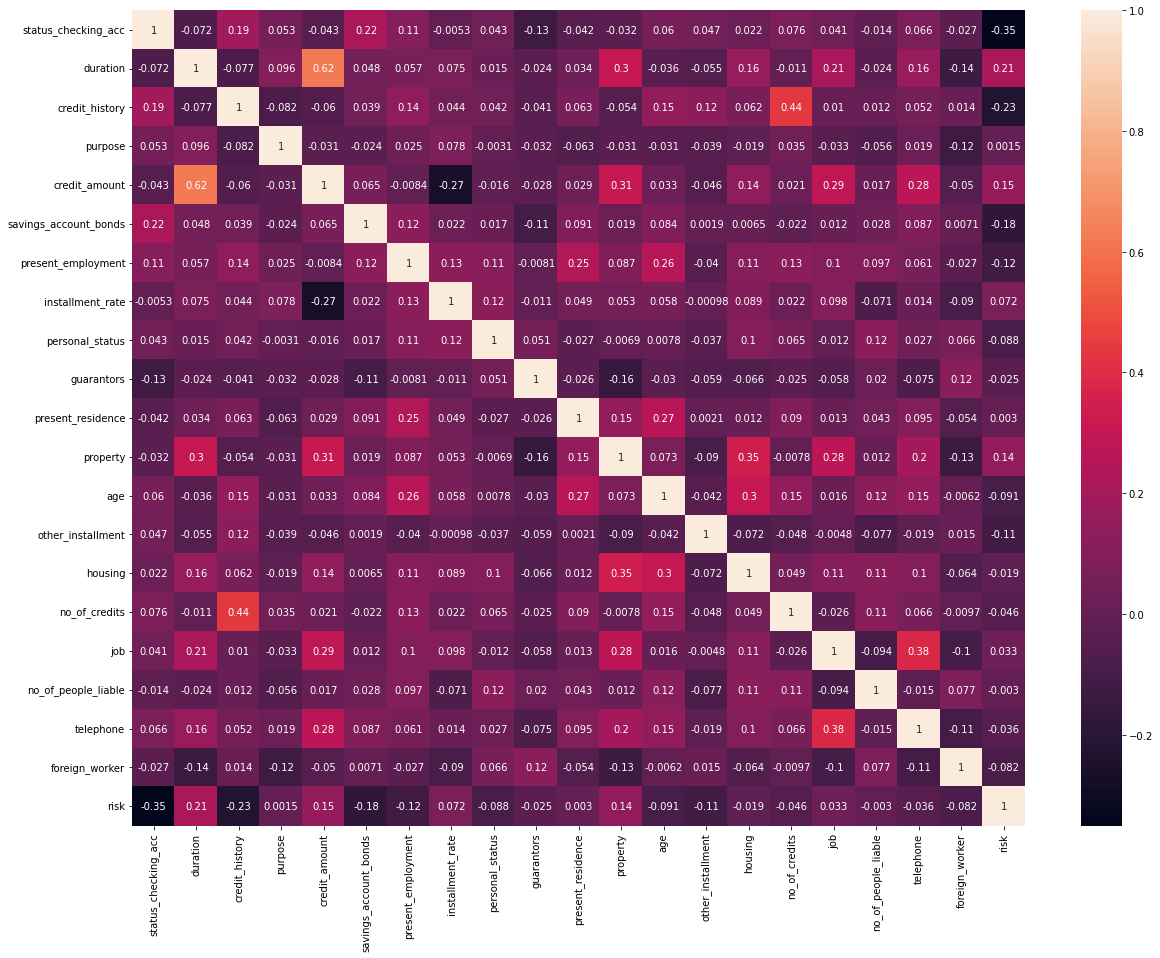

In [ ]:
correlation_data = credit_data.corr()
plt.subplots(figsize=(20,15))
sns.heatmap(correlation_data, annot=True)
plt.show()

Arranging columns according to their correlation with outcome variable in descending order

In [ ]:
correlation_values = correlation_data['risk'].sort_values(ascending=False)
correlation_values = abs(correlation_values).sort_values(ascending=False)
print("Correlation of Features wrt Risk")
print(abs(correlation_values).sort_values(ascending=False))

Correlation of Features wrt Risk
risk                     1.000000
status_checking_acc      0.350847
credit_history           0.228785
duration                 0.214927
savings_account_bonds    0.178943
credit_amount            0.154739
property                 0.142612
present_employment       0.116002
other_installment        0.109844
age                      0.091127
personal_status          0.088184
foreign_worker           0.082079
installment_rate         0.072404
no_of_credits            0.045732
telephone                0.036466
job                      0.032735
guarantors               0.025137
housing                  0.019315
no_of_people_liable      0.003015
present_residence        0.002967
purpose                  0.001514
Name: risk, dtype: float64


### Histograms for all features

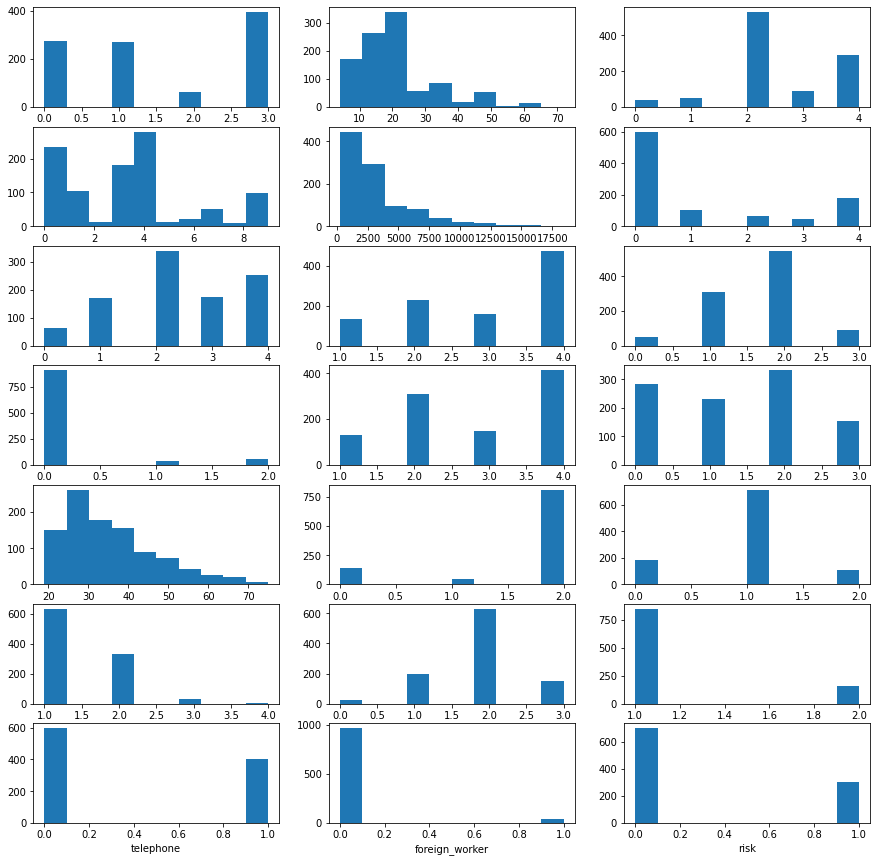

In [ ]:
plt.figure(figsize=(15,15))
col = credit_data.columns
for i in range(0,len(col)):
    plt.subplot(len(col)//3,3,i+1)
    plt.hist(credit_data[col[i]]);
    plt.xlabel(col[i])

Number of samples per class

In [ ]:
credit_data['risk'].value_counts()

0    700
1    300
Name: risk, dtype: int64

## 4. Data Partition (80% for training and 20% for testing) (Use scikit-learn)

In [ ]:
X = credit_data.drop(columns='risk')
Y = credit_data[['risk']]
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=77)]
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test= scaler.transform(X_test)

## 5. Build the model (use scikit learn)

In [ ]:
regression_model_credit = LogisticRegression(C=0.1)
regression_model_credit.fit(X_train, y_train)

LogisticRegression(C=0.1)

## 6. Summarize the model. 

In [ ]:
regression_model_credit.get_params()

{'C': 0.1,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

## 7. Prediction

In [ ]:
y_pred = regression_model_credit.predict(X_test)

## 8. Evaluate the model

## Test Accuracy

In [ ]:
print(f"Test Accuracy: {round(accuracy_score(y_test, y_pred) * 100,3)} %" )

Test Accuracy: 83.5 %


## Confusion Matrix

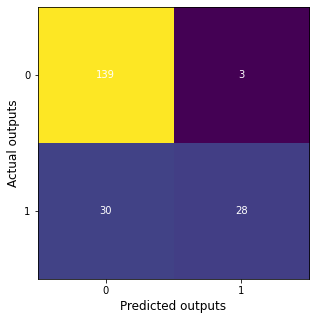

In [ ]:
cm = confusion_matrix(y_test, y_pred)

fig, ax = plt.subplots(figsize=(5, 5))
ax.imshow(cm)
ax.grid(False)
ax.set_xlabel('Predicted outputs', fontsize=12, color='black')
ax.set_ylabel('Actual outputs', fontsize=12, color='black')
ax.xaxis.set(ticks=range(2))
ax.yaxis.set(ticks=range(2))
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='white')
plt.show()

## Classification Report

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.98      0.89       142
           1       0.90      0.48      0.63        58

    accuracy                           0.83       200
   macro avg       0.86      0.73      0.76       200
weighted avg       0.85      0.83      0.82       200



## ROC Curve and AUC for each Class

In [ ]:
y_prob = regression_model_credit.predict_proba(X_test)

y_prob = y_prob[:, 1]

n_classes = len(regression_model_credit.classes_)

fpr, tpr,_ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

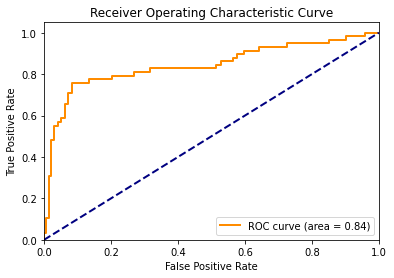

In [ ]:
lw = 2
plt.plot(
    fpr,
    tpr,
    color="darkorange",
    lw=lw,
    label="ROC curve (area = %0.2f)" % roc_auc,
)
plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic Curve")
plt.legend(loc="lower right")
plt.show()

## 9. Tuning the model

In [ ]:
LR_credit = LogisticRegression()
LRparam_grid = {
    'C': [0.001, 0.01, 1, 10],
    'penalty': ['l1', 'l2'],
    'max_iter': list(range(100,500,100)),
    'solver': ['newton-cg', 'lbfgs', 'sag', 'saga']
}

In [ ]:
LR_search_credit = GridSearchCV(LR_credit, param_grid=LRparam_grid, verbose = 3, cv=5)

# fitting the model for grid search 
LR_search_credit.fit(X , Y)

Fitting 5 folds for each of 128 candidates, totalling 640 fits
[CV 1/5] END C=0.001, max_iter=100, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/5] END C=0.001, max_iter=100, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/5] END C=0.001, max_iter=100, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 4/5] END C=0.001, max_iter=100, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 5/5] END C=0.001, max_iter=100, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 1/5] END C=0.001, max_iter=100, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END C=0.001, max_iter=100, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END C=0.001, max_iter=100, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 4/5] END C=0.001, max_iter=100, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 5/5] END C=0.001, max_iter=100, penalty=l1, solver=lbfgs;, score=nan total time=   0.

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 1, 10],
                         'max_iter': [100, 200, 300, 400],
                         'penalty': ['l1', 'l2'],
                         'solver': ['newton-cg', 'lbfgs', 'sag', 'saga']},
             verbose=3)

In [ ]:
# summarize
print('Mean Accuracy:; %.3f' % LR_search_credit.best_score_)
print('Best Parameters: %s' % LR_search_credit.best_params_)

Mean Accuracy:; 0.758
Best Parameters: {'C': 1, 'max_iter': 100, 'penalty': 'l2', 'solver': 'newton-cg'}


In [ ]:
LR_tuned_credit = LogisticRegression(**LR_search_credit.best_params_)

In [ ]:
LR_tuned_credit.fit(X_train, y_train)

LogisticRegression(C=1, solver='newton-cg')

## Prediction

In [ ]:
y_pred = LR_tuned_credit.predict(X_test)

## Test Accuracy

In [ ]:
print(f"Test Accuracy: {round(accuracy_score(y_test, y_pred) * 100,3)} %" )

Test Accuracy: 85.0 %


## Confusion Matrix

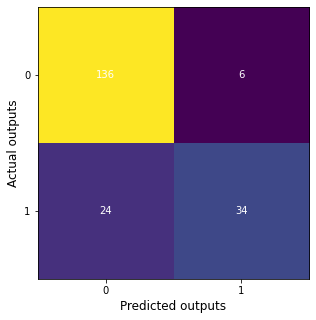

In [ ]:
cm = confusion_matrix(y_test, y_pred)

fig, ax = plt.subplots(figsize=(5, 5))
ax.imshow(cm)
ax.grid(False)
ax.set_xlabel('Predicted outputs', fontsize=12, color='black')
ax.set_ylabel('Actual outputs', fontsize=12, color='black')
ax.xaxis.set(ticks=range(2))
ax.yaxis.set(ticks=range(2))
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='white')
plt.show()

## Classification Report

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.96      0.90       142
           1       0.85      0.59      0.69        58

    accuracy                           0.85       200
   macro avg       0.85      0.77      0.80       200
weighted avg       0.85      0.85      0.84       200



## ROC Curve and AUC for each Class

In [ ]:
y_prob = LR_tuned_credit.predict_proba(X_test)

y_prob = y_prob[:, 1]

n_classes = len(LR_tuned_credit.classes_)

fpr, tpr,_ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

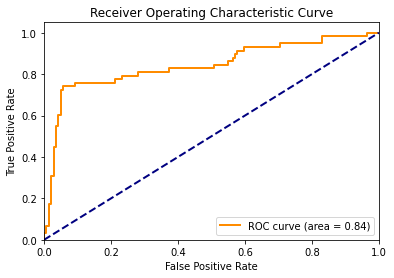

In [ ]:
lw = 2
plt.plot(
    fpr,
    tpr,
    color="darkorange",
    lw=lw,
    label="ROC curve (area = %0.2f)" % roc_auc,
)
plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic Curve")
plt.legend(loc="lower right")
plt.show()

# Conclusion

1. Th dataset did not have any null values.
2. The baseline regression model gave the accuracy of 83.5% and the tuned regression model increased the accuracy to 85%.
3. The class distribution is uneven hence lesser f1-score of the class 1 (Bad Risk) than class 0 (Good Risk)